# Model machine learning Classification Thyroid Cancer

## Part 1 - Business Problem:

**Objective:**

- Develop a machine learning model to predict the recurrence of well-differentiated thyroid cancer based on clinicopathologic features.

**Potential Benefits:**

- Identify patients at higher risk of recurrence, enabling early interventions and more effective treatments.

- Improve the management of hospital resources by focusing attention on patients with a higher likelihood of recurrence.

- Assist doctors in clinical decision-making by providing insights into individual recurrence risk for patients.

**Machine Learning Model:**

**1. Data Preprocessing:**

- Handle missing values, if any.

- Encode categorical variables into numerical format (e.g., one-hot encoding).

- Split the data into training and testing sets.

**2. Model Selection:**

- Since this is a classification problem, models such as Random Forest, SVM (Support Vector Machine), and Neural Networks can be initially explored.

**3. Model Training:**

- Train various machine learning models with the training set.

- Tune the hyperparameters of the models for better performance.

**4. Model Evaluation:**

- Evaluate the model's performance using classification evaluation metrics such as accuracy, recall, F1-score, and confusion matrix.

- Use cross-validation techniques to verify the model's generalization.

**5. Model Optimization and Improvement:**

- Iterate over different models and preprocessing techniques to improve model performance.

- Consider advanced techniques like ensemble learning to enhance model robustness.

**6. Model Deployment**

- Integrate the model into a production system so it can be used by doctors in the clinical environment.

- Continuously monitor the model's performance and make adjustments as necessary.

**7. Model Maintenance:**

- Periodically update the model with new data and clinical insights.

- Regularly re-evaluate the model's relevance and performance metrics.

This framework provides a basic guide for addressing the business problem and developing a machine learning model to predict the recurrence of well-differentiated thyroid cancer based on the given data. As you progress through the process, you may need to adjust and adapt this framework based on the specific characteristics of the problem and the results obtained during modeling.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-cancer-recurrence-prediction/Thyroid_Diff.csv


In [2]:
# Installing packages
!pip install watermark
!pip install lifelines

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b5f2c8cd1a72867148b00af032b40df9567b1db6b8077432482142432c015276
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [3]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Library machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.13
Author: Library versions

matplotlib: 3.7.5
lightgbm  : 4.2.0
numpy     : 1.26.4
seaborn   : 0.12.2
plotly    : 5.18.0
pandas    : 2.2.2
re        : 2.2.1
watermark : 2.4.3



## Part 2 - Database


In [4]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
train_df = pd.read_csv("/kaggle/input/thyroid-cancer-recurrence-prediction/Thyroid_Diff.csv")
train_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Viewing first 5 data
train_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
# Viewing 5 latest data
train_df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [7]:
# Type dados
train_df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [8]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

## Part 3 - Exploratory data analysis¶

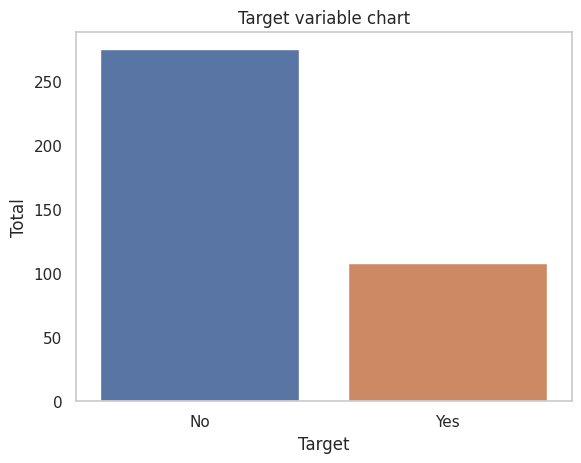

In [9]:
sns.countplot(data=train_df, x="Recurred")
plt.title("Target variable chart")
plt.xlabel("Target")
plt.ylabel("Total")
plt.grid(False)
plt.show()

In this bar chart, we can observe the target variable used for the machine learning model. The target variable, also known as the dependent variable, is the main parameter we aim to predict or classify with our model. Each bar in the chart represents the frequency or count of occurrences for each distinct category or value of the target variable. The visual analysis of this chart is crucial as it allows us to understand the data distribution and identify potential class imbalances, which can significantly influence the model's performance. For instance, if one class is underrepresented, the model might struggle to learn patterns associated with that class, resulting in less accurate predictions. 
Furthermore, visualizing the target variable can help detect outliers or anomalous values that may require special handling before training the model. Understanding the distribution of the target variable is a fundamental step in the data preprocessing phase, contributing to the construction of more robust and effective models.

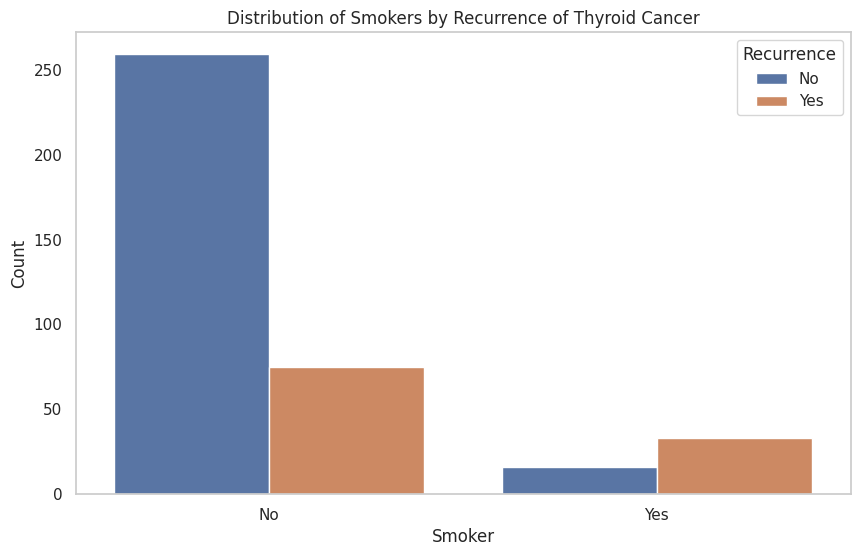

In [10]:
# 2. Percentage of smoking patients among recurrent and non-recurrent patients
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='Recurred', data=train_df)
plt.title('Distribution of Smokers by Recurrence of Thyroid Cancer')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Recurrence')
plt.grid(False)
plt.show()

In this chart, we can observe the distribution of smokers in relation to the recurrence of thyroid cancer. The visual analysis of this chart is essential to understand how smoking habits may be associated with the recurrence of thyroid cancer. Each bar in the chart represents the frequency or count of thyroid cancer recurrence cases, categorized by smokers and non-smokers. This visualization allows us to identify important patterns and trends, such as the potential correlation between smoking and the rate of cancer recurrence.

Explaining this relationship is crucial for public awareness and for the formulation of prevention and treatment strategies. Studies suggest that smoking can affect the immune system and cellular repair processes, potentially increasing the risk of recurrence for various types of cancer, including thyroid cancer. Additionally, understanding the distribution of smokers among recurrence cases can help healthcare professionals identify high-risk groups and develop targeted smoking cessation programs. This information is valuable not only for individual treatment but also for public health campaigns aimed at reducing smoking and, consequently, cancer recurrence.

Therefore, the analysis of this chart not only clarifies the relationship between smoking and thyroid cancer recurrence but also reinforces the importance of public health policies aimed at reducing tobacco consumption.

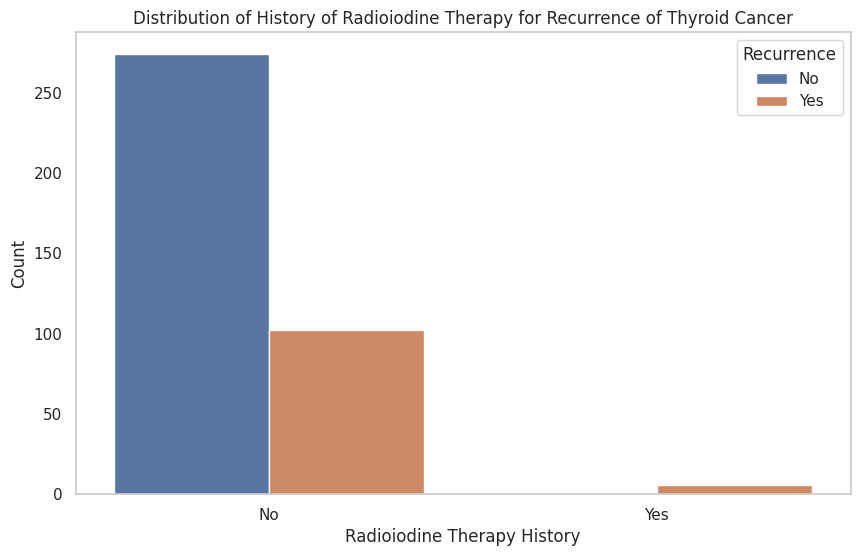

In [11]:
# 3. Percentage of patients with a history of radioiodine therapy among recurrent and non-recurrent patients
plt.figure(figsize=(10, 6))
sns.countplot(x='Hx Radiothreapy', hue='Recurred', data=train_df)
plt.title('Distribution of History of Radioiodine Therapy for Recurrence of Thyroid Cancer')
plt.xlabel('Radioiodine Therapy History')
plt.ylabel('Count')
plt.legend(title='Recurrence')
plt.grid(False)
plt.show()

In this chart, we can observe the distribution of radioiodine therapy history in relation to the recurrence of thyroid cancer. The visual analysis of this chart is essential to understand how treatment with radioiodine therapy may be associated with the recurrence of thyroid cancer.

Each bar in the chart represents the frequency or count of thyroid cancer recurrence cases, categorized based on the patients' history of radioiodine therapy. This visualization allows us to identify important patterns and trends, such as the possible correlation between radioiodine therapy and the rate of cancer recurrence.

Explaining this relationship is crucial for public awareness and for the formulation of more effective treatment strategies. Studies indicate that radioiodine therapy is a common treatment for thyroid cancer, used to eliminate remaining cancer cells after surgery. However, its effectiveness can vary, and some patients may still face cancer recurrence.

Additionally, understanding the distribution of patients with a history of radioiodine therapy among recurrence cases can help healthcare professionals identify additional risk factors and adjust treatment protocols. This information is valuable both for individual treatment and for the development of more robust clinical guidelines.

Therefore, the analysis of this chart not only clarifies the relationship between radioiodine therapy and thyroid cancer recurrence but also reinforces the importance of personalized approaches in cancer treatment and the need for continuous monitoring of patients undergoing this type of therapy.

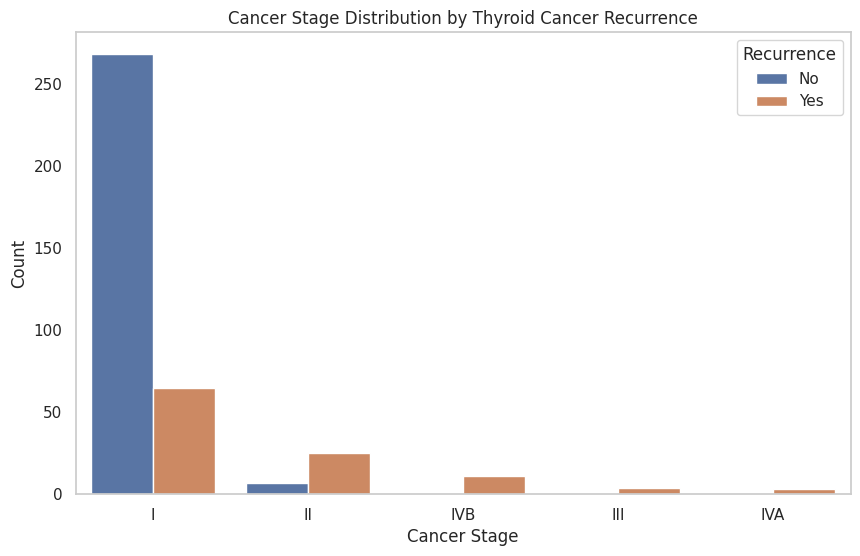

In [12]:
#4. Distribution of cancer stages between recurrent and non-recurrent patients
plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', hue='Recurred', data=train_df)
plt.title('Cancer Stage Distribution by Thyroid Cancer Recurrence')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Recurrence')
plt.grid(False)
plt.show()

In this graphic, we explain the different stages of cancer, detailing how the disease progresses and how this affects the patient's treatment and prognosis. Cancer is classified into stages ranging from 0 to IV, based on the extent of the primary tumor, the spread to nearby lymph nodes and the presence of metastases in distant organs.

1. **Stage 0 (Carcinoma in situ):** At this early stage, cancer cells are limited to the layer of cells where they originated and have not spread to adjacent tissues. This is the most treatable stage, usually removed surgically with a high cure rate.

2. **Stage I (Localized):** The tumor is small and confined to the organ of origin, without involvement of nearby lymph nodes or metastasis. Treatment usually involves surgery and, in some cases, radiation therapy or chemotherapy to ensure complete elimination of the cancer cells.

3. **Stage II (Locally advanced):** The cancer grows but is still confined to the organ of origin, although it may have begun to spread to nearby lymph nodes. Treatment can be more aggressive, including surgery, chemotherapy, and radiation therapy combined.

4. **Stage III (Regionally advanced):** The cancer has spread to nearby lymph nodes and may have invaded adjacent structures or organs. Treatment is more complex, often requiring a combination of surgery, chemotherapy, radiation therapy and, in some cases, targeted therapy.

5. **Stage IV (Metastatic):** The cancer has spread to distant organs, such as the lungs, liver, or bones. This is the most advanced and difficult to treat stage, with a focus on controlling the progression of the disease and improving the patient's quality of life. Treatments include chemotherapy, targeted therapy, immunotherapy and palliative care.

Understanding the stages of cancer is crucial to determining the best treatment plan and predicting the prognosis. Accurate classification helps healthcare professionals choose the most effective interventions and inform patients about their treatment options and expectations.

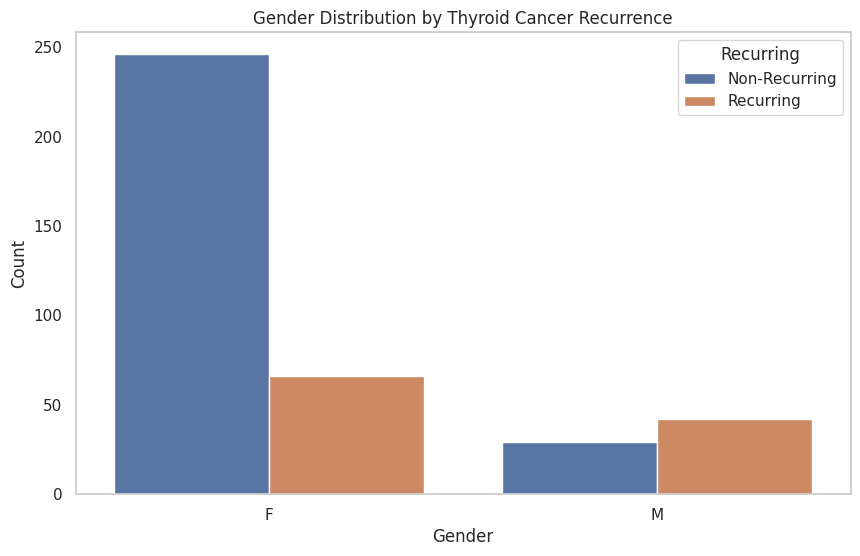

In [13]:
# Creating gender distribution graph by thyroid cancer recurrence
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Recurred', data=train_df)
plt.title('Gender Distribution by Thyroid Cancer Recurrence')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding legend inside the chart
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Non-Recurring', 'Recurring'], title='Recurring', loc='upper right')
plt.grid(False)
plt.show()

In the graph below, we present the Gender Distribution by Recurrence of Thyroid Cancer. It is important to note that thyroid cancer predominantly affects females, with a significantly higher incidence compared to males. This gender disparity in the prevalence of thyroid cancer is a widely recognized phenomenon in the medical and research community. This female predominance in thyroid cancer can be attributed to several factors, including hormonal and genetic differences between the sexes, as well as the influence of environmental and behavioral factors. Higher rates of thyroid cancer among women highlight the importance of awareness, screening, and education about this disease, especially among high-risk populations. 
Although thyroid cancer is more common in women, it is important to note that it can also affect men, and early surveillance and diagnosis are equally essential for both sexes. Therefore, understanding the gender distribution of thyroid cancer recurrence highlights the need for prevention, detection and treatment strategies adapted to the specific characteristics of each population group.

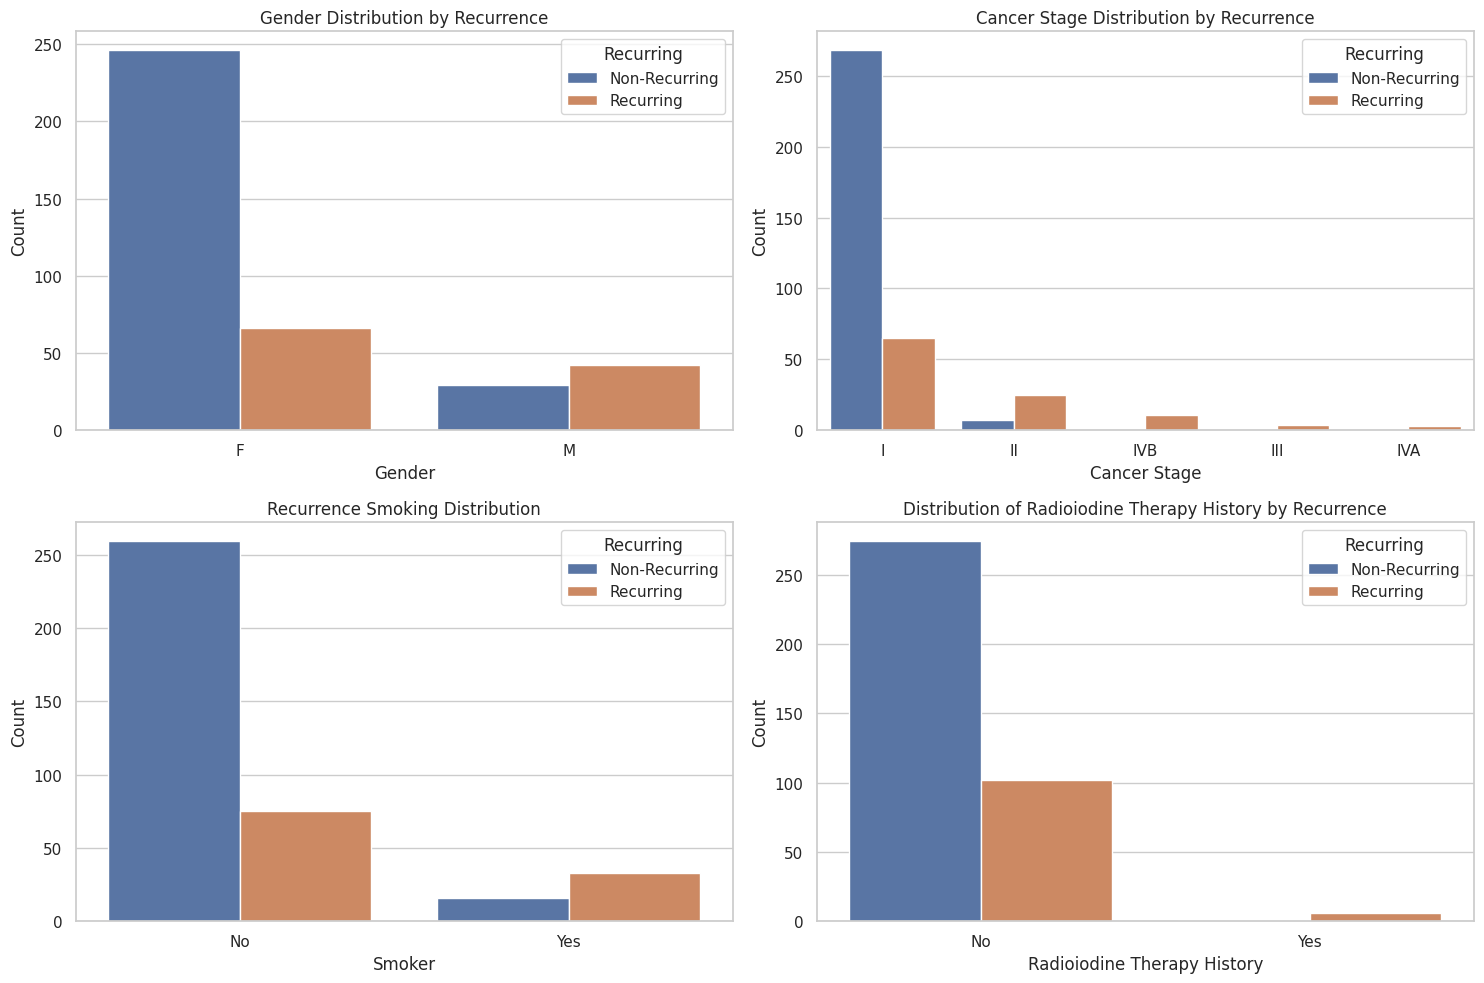

In [14]:
# Creating charts for each indicator
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution by thyroid cancer recurrence
sns.countplot(x='Gender', hue='Recurred', data=train_df, ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution by Recurrence')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles, ['Non-Recurring', 'Recurring'], title='Recurring', loc='upper right')

# Distribution of cancer stages by thyroid cancer recurrence
sns.countplot(x='Stage', hue='Recurred', data=train_df, ax=axs[0, 1])
axs[0, 1].set_title('Cancer Stage Distribution by Recurrence')
axs[0, 1].set_xlabel('Cancer Stage')
axs[0, 1].set_ylabel('Count')
handles, labels = axs[0, 1].get_legend_handles_labels()
axs[0, 1].legend(handles, ['Non-Recurring', 'Recurring'], title='Recurring', loc='upper right')

# Distribution of smokers by thyroid cancer recurrence
sns.countplot(x='Smoking', hue='Recurred', data=train_df, ax=axs[1, 0])
axs[1, 0].set_title('Recurrence Smoking Distribution')
axs[1, 0].set_xlabel('Smoker')
axs[1, 0].set_ylabel('Count')
handles, labels = axs[1, 0].get_legend_handles_labels()
axs[1, 0].legend(handles, ['Non-Recurring', 'Recurring'], title='Recurring', loc='upper right')

# Distribution of radioiodine therapy history for thyroid cancer recurrence
sns.countplot(x='Hx Radiothreapy', hue='Recurred', data=train_df, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Radioiodine Therapy History by Recurrence')
axs[1, 1].set_xlabel('Radioiodine Therapy History')
axs[1, 1].set_ylabel('Count')
handles, labels = axs[1, 1].get_legend_handles_labels()
axs[1, 1].legend(handles, ['Non-Recurring', 'Recurring'], title='Recurring', loc='upper right')

# Layout adjustment
plt.tight_layout()
plt.show()

Here, in this subplot, we present a more detailed analysis on thyroid cancer. There are four graphs that offer crucial insights into different aspects of the disease and its recurrence:

Gender Distribution by Recurrence: The first graph highlights the difference in the incidence of thyroid cancer recurrence between genders. Notably, we observed a significant predominance of recurrent cases in women compared to men. This gender disparity can provide valuable insights to direct prevention and treatment strategies.

Distribution of Cancer Stage by Recurrence: The second graph analyzes how the recurrence of thyroid cancer varies according to the stage of the disease. This helps to better understand which stages are more prone to recurrence and, consequently, may require closer monitoring or more aggressive treatment strategies.

Distribution of Smokers by Recurrence: In the third graph, we examine the relationship between smoking and the recurrence of thyroid cancer. Studies suggest a possible association between smoking and the recurrence of thyroid cancer, highlighting the importance of smoking cessation as an integral part of disease management.

Distribution of Radioiodine Therapy History by Recurrence: Finally, the fourth graph investigates the impact of radioiodine therapy history on thyroid cancer recurrence. Radioiodine therapy is commonly used to treat this disease, and understanding how treatment history influences recurrence is essential to optimizing clinical outcomes.

These charts provide a comprehensive and detailed look at thyroid cancer, exploring different factors that can influence its recurrence. This information is essential to guide more effective prevention, early detection and treatment strategies, aiming to improve the results and quality of life of patients affected by this condition.

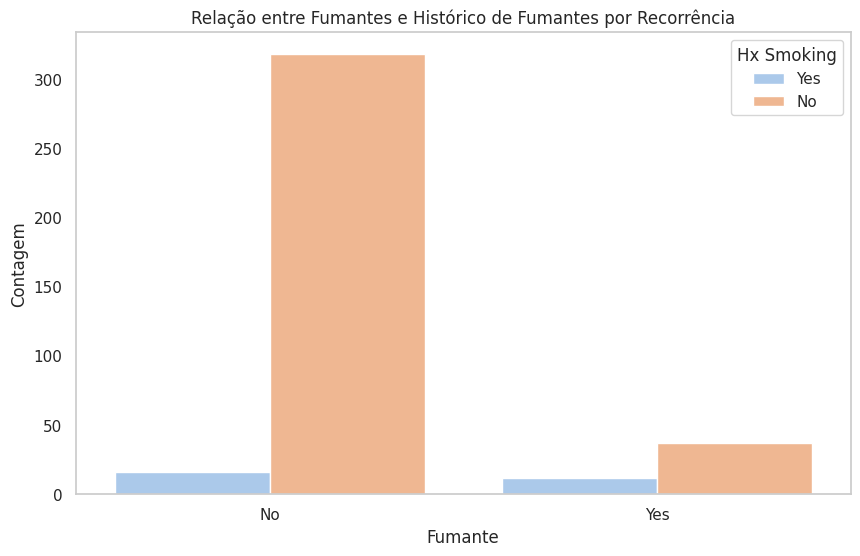

In [15]:
# 2. Relação entre Fumantes e Histórico de Fumantes por Recorrência
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='Hx Smoking', hue_order=['Yes', 'No'], data=train_df, palette='pastel')
plt.title('Relação entre Fumantes e Histórico de Fumantes por Recorrência')
plt.xlabel('Fumante')
plt.ylabel('Contagem')
plt.legend(title='Hx Smoking', loc='upper right')
plt.grid(False)
plt.show()

Here, in this bar graph, we can observe the incidence of smoking history within the family in relation to cancer. This graph provides a valuable analysis of the possible genetic and environmental influence of smoking on the predisposition to the development of cancer. The presence of a history of smoking in the family can significantly increase the risk of cancer, highlighting the importance of raising awareness about the harmful effects of tobacco not only for current smokers, but also for their families. These insights can guide prevention strategies and personalized interventions to reduce the burden of smoking-related cancer and improve the health of the general population.

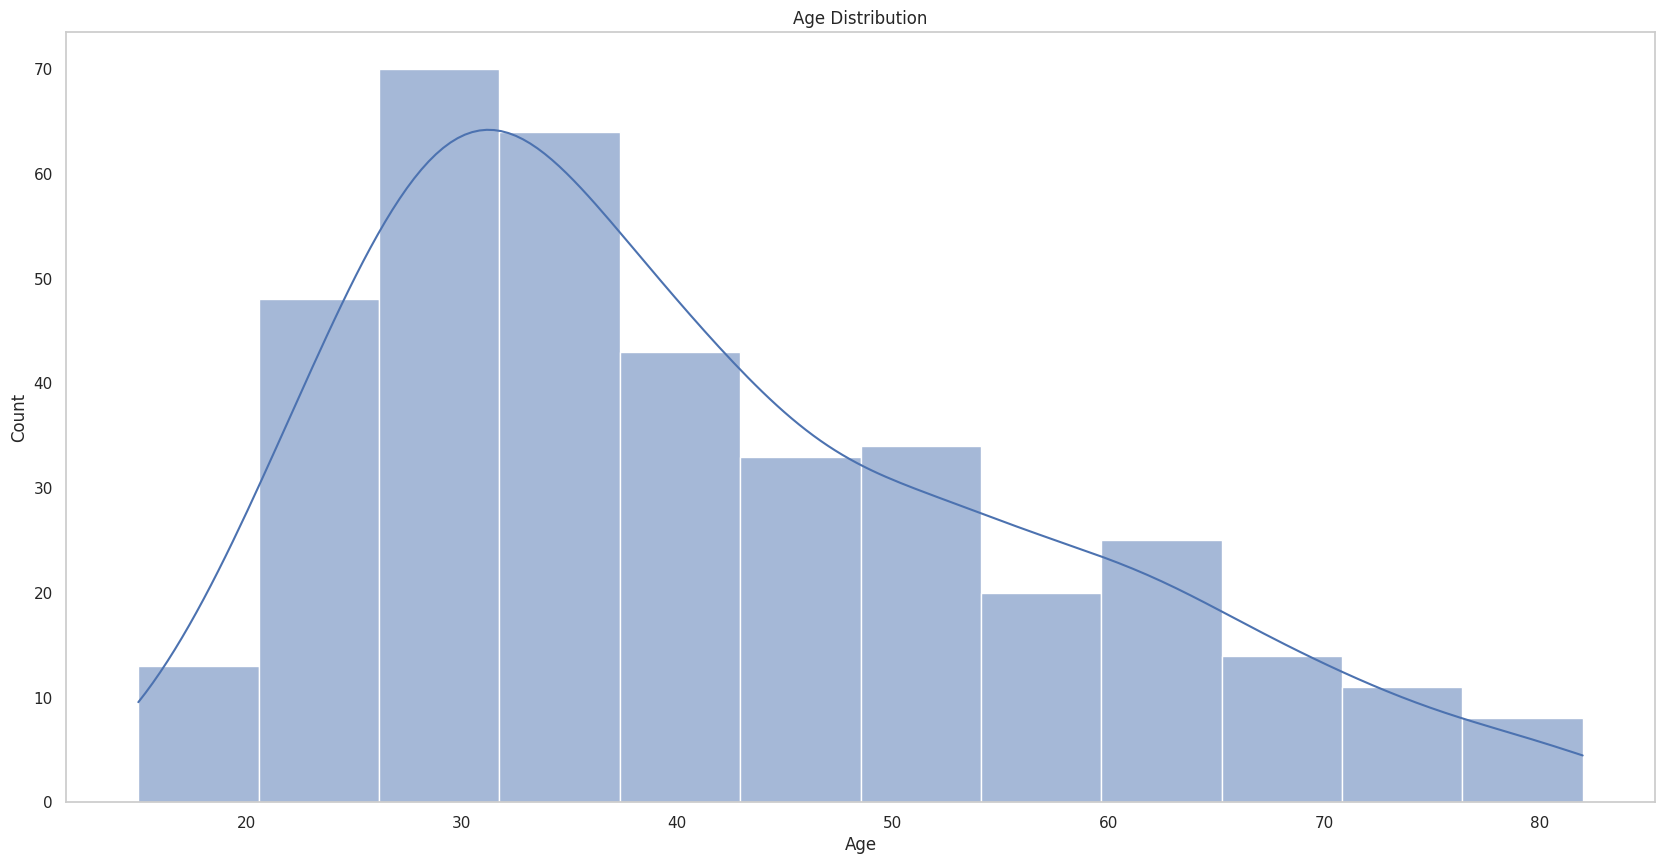

In [16]:
# Age Distribution Chart
plt.figure(figsize=(20.5, 10))
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()

- In this histogram, we analyze the ages of patients diagnosed with the condition, ranging from 20 to 80 years. Notably, we observed a significant peak in the 30-40 age group, indicating a particularly high concentration of patients in this age group. This age distribution can offer important insights into possible risk factors, diagnostic patterns, and even issues related to healthcare accessibility. Understanding the age distribution of patients is essential to direct screening strategies, early diagnosis and appropriate treatment, aiming to improve the results and quality of life of patients affected by this condition.

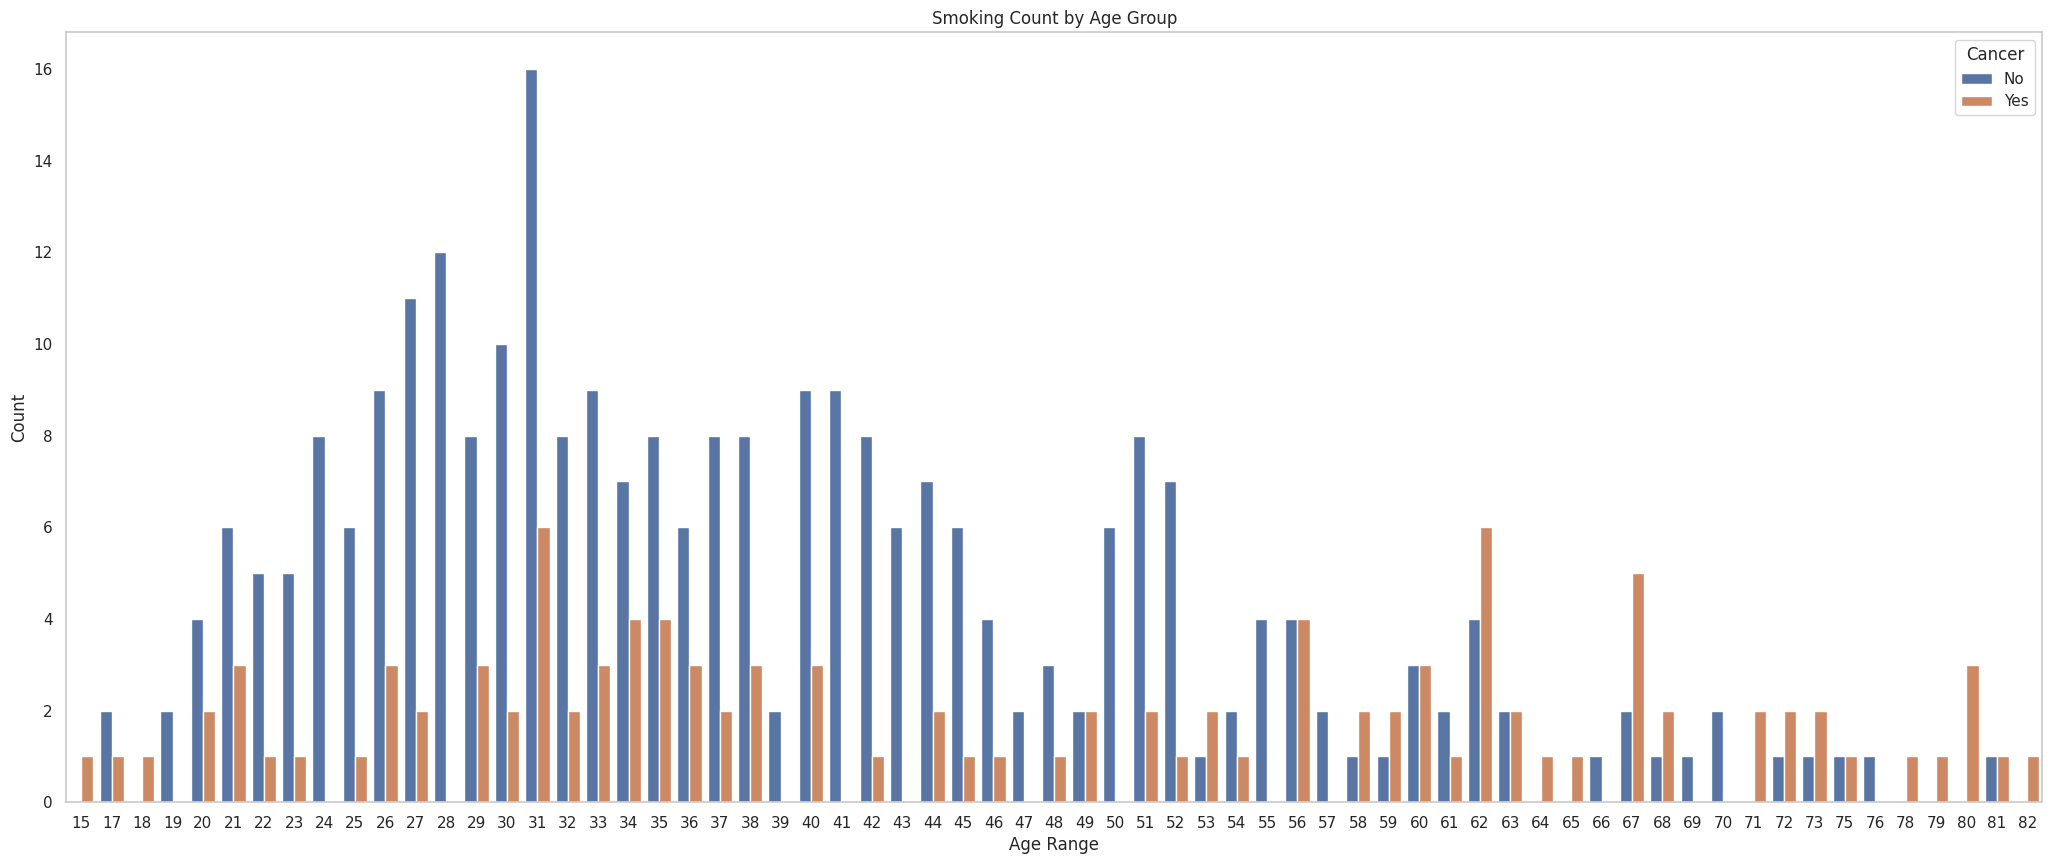

In [17]:
# Count of Smokers by Age Group (Grouped Bar Chart)
plt.figure(figsize=(25.5, 10))
sns.countplot(x='Age', hue='Recurred', data=train_df)
plt.title('Smoking Count by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Cancer')
plt.grid(False)
plt.show()

In this graph, we can observe the relationship between the patients' ages and the occurrence of cancer, represented by "yes" or "no". Notably, the ages of 31, 56 and 62 stand out, where there is a significant incidence of patients diagnosed with cancer. These highlighted points indicate specific age groups that may be associated with a greater risk of developing the disease. Understanding these trends is crucial to identify high-risk groups, guide more effective prevention and screening strategies, and ensure early and appropriate interventions to improve clinical outcomes and quality of life for patients.

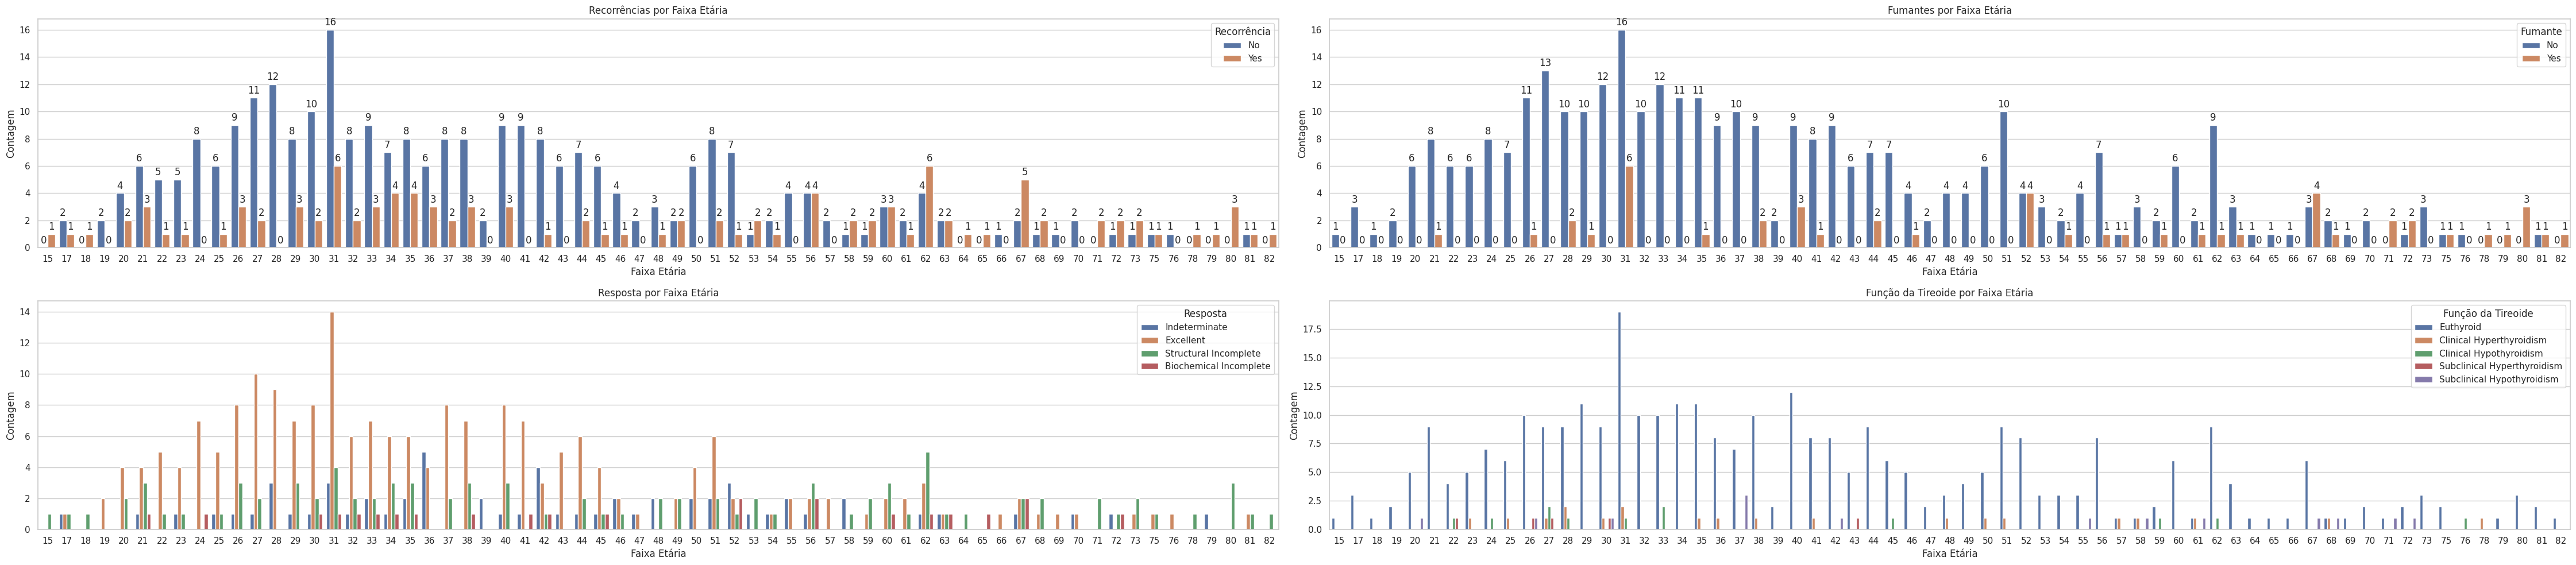

In [18]:
# Criando subplots
fig, axs = plt.subplots(2, 2, figsize=(45.0, 10))

# Gráfico 1: Contagem de Recorrências por Faixa Etária
sns.countplot(x='Age', hue='Recurred', data=train_df, ax=axs[0, 0])
axs[0, 0].set_title('Recorrências por Faixa Etária')
axs[0, 0].set_xlabel('Faixa Etária')
axs[0, 0].set_ylabel('Contagem')
axs[0, 0].legend(title='Recorrência')

# Adicionando números dentro do gráfico de Estágio e Recorrência
for p in axs[0,0].patches:
    axs[0,0].annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Gráfico 2: Contagem de Fumantes por Faixa Etária
sns.countplot(x='Age', hue='Smoking', data=train_df, ax=axs[0, 1])
axs[0, 1].set_title('Fumantes por Faixa Etária')
axs[0, 1].set_xlabel('Faixa Etária')
axs[0, 1].set_ylabel('Contagem')
axs[0, 1].legend(title='Fumante')

# Adicionando números dentro do gráfico de Estágio e Recorrência
for p in axs[0,1].patches:
    axs[0,1].annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Gráfico 3: Contagem de Resposta por Faixa Etária
sns.countplot(x='Age', hue='Response', data=train_df, ax=axs[1, 0])
axs[1, 0].set_title('Resposta por Faixa Etária')
axs[1, 0].set_xlabel('Faixa Etária')
axs[1, 0].set_ylabel('Contagem')
axs[1, 0].legend(title='Resposta')

# Gráfico 4: Contagem de Função da Tireoide por Faixa Etária
sns.countplot(x='Age', hue='Thyroid Function', data=train_df, ax=axs[1, 1])
axs[1, 1].set_title('Função da Tireoide por Faixa Etária')
axs[1, 1].set_xlabel('Faixa Etária')
axs[1, 1].set_ylabel('Contagem')
axs[1, 1].legend(title='Função da Tireoide')

# Ajustando layout
plt.tight_layout()

# Exibindo os subplots
plt.show()

In these three graphs in subplots, we address different aspects related to thyroid cancer and its relationship with the age group of patients:

Recurrences by Age Group: The first graph highlights the distribution of thyroid cancer recurrences in different age groups. We observed how the incidence of recurrence varies across age groups, providing insights into possible patterns of disease progression in different age groups. Understanding this relationship is crucial to adapt treatment and monitoring strategies according to the age of patients.

Smokers by Age Group: In the second graph, we explore the prevalence of smoking among patients diagnosed with thyroid cancer in different age groups. This graph provides important information about the association between smoking and thyroid cancer in different age groups, highlighting the importance of raising awareness about the risks of smoking in all age groups.

Response by Age Group, Thyroid Function by Age Group: The third graph shows the ages of patients diagnosed with thyroid cancer. This visualization provides a general understanding of the age distribution of patients affected by the disease, which can be crucial for identifying patterns, risk factors and specific needs of each age group in terms of treatment and follow-up.

These combined graphs provide a comprehensive view of the relationship between age group and thyroid cancer, including recurrences, smoking status, response to treatment, and age distribution of affected patients. This information is essential to personalize prevention, diagnosis and treatment approaches, aiming to improve outcomes and quality of life for patients in all age groups.

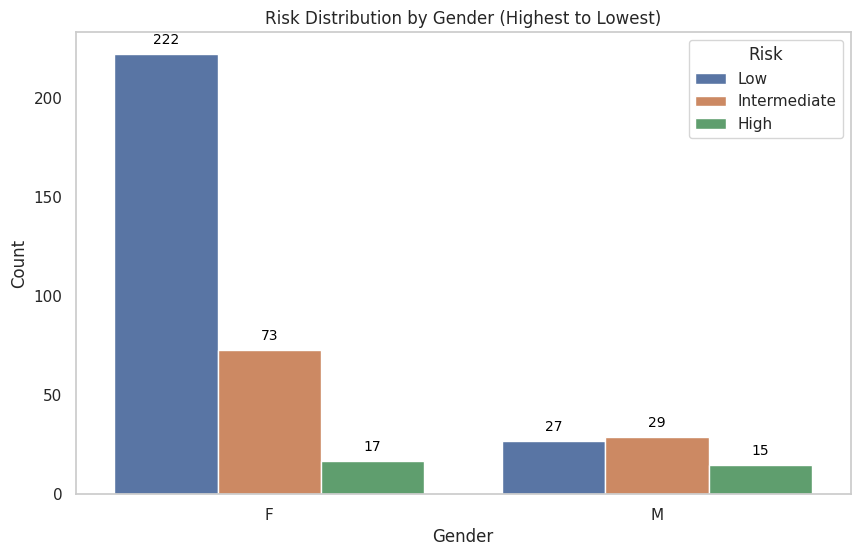

In [19]:
# Analysis of Categorical Variables: Distribution by Gender
plt.figure(figsize=(10, 6))

# Ordering the DataFrame by the count of 'Risk' for each 'Gender'
ordered_df = train_df.groupby(['Gender', 'Risk']).size().reset_index(name='Count')
ordered_df = ordered_df.sort_values(by='Count', ascending=False)

# Plotting the bar chart
ax = sns.barplot(x='Gender', y='Count', hue='Risk', data=ordered_df)
plt.title('Risk Distribution by Gender (Highest to Lowest)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Risk')

# Adding numbers inside bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.grid(False)
plt.show()

In this bar graph, we present the total cancer risks for male and female sex classes. It is clear that the risk of cancer is significantly higher in females, with a total of 73 cases compared to just 29 cases in males. This gender disparity in cancer incidence is a well-documented phenomenon and can be attributed to a number of factors, including hormonal, genetic, and behavioral differences between the sexes. Understanding this difference in risk is crucial to guide prevention, early detection and treatment strategies to reduce the impact of cancer and improve health outcomes for both sexes.

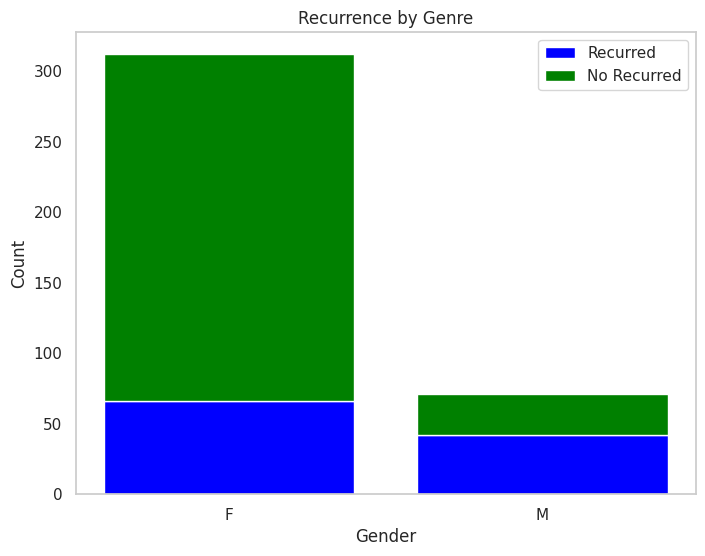

In [20]:
# Stacked Bar Chart for Recurrence and Non-Recurrence by Gender
recurred_counts = train_df[train_df['Recurred'] == 'Yes']['Gender'].value_counts()
non_recurred_counts = train_df[train_df['Recurred'] == 'No']['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(recurred_counts.index, recurred_counts, color='blue', label='Recurred')
plt.bar(non_recurred_counts.index, non_recurred_counts, bottom=recurred_counts, color='green', label='No Recurred')
plt.title('Recurrence by Genre')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.show()

- In this bar graph, we illustrate the number of surgeries performed and the success in patient recovery. Each bar represents the total number of surgeries performed to treat thyroid cancer, while the height of the bars indicates the number of patients who recovered after the procedure. This graph gives us a clear picture of the effectiveness of surgery in treating this condition, highlighting the proportion of patients who achieved a successful recovery. This analysis is critical for evaluating the effectiveness of surgical procedures and for informing medical decisions about the best course of treatment for patients with thyroid cancer.

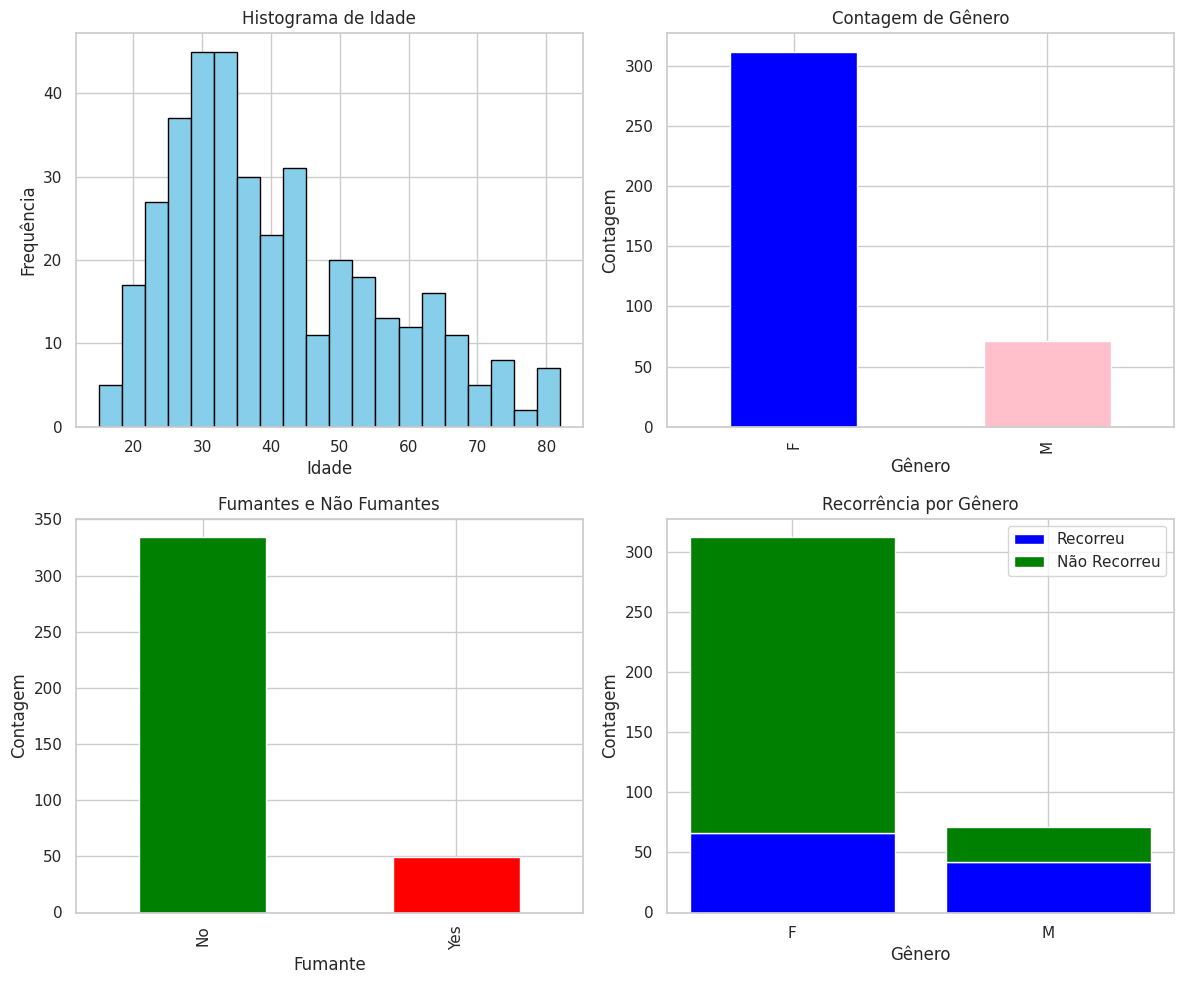

In [21]:
# Criando subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histograma de Idade
axs[0, 0].hist(train_df['Age'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histograma de Idade')
axs[0, 0].set_xlabel('Idade')
axs[0, 0].set_ylabel('Frequência')

# Gráfico de Contagem de Gênero
train_df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'], ax=axs[0, 1])
axs[0, 1].set_title('Contagem de Gênero')
axs[0, 1].set_xlabel('Gênero')
axs[0, 1].set_ylabel('Contagem')

# Gráfico de Barras de Fumantes e Não Fumantes
train_df['Smoking'].value_counts().plot(kind='bar', color=['green', 'red'], ax=axs[1, 0])
axs[1, 0].set_title('Fumantes e Não Fumantes')
axs[1, 0].set_xlabel('Fumante')
axs[1, 0].set_ylabel('Contagem')

# Gráfico de Barras Empilhadas para Recorrência e Não Recorrência por Gênero
recurred_counts = train_df[train_df['Recurred'] == 'Yes']['Gender'].value_counts()
non_recurred_counts = train_df[train_df['Recurred'] == 'No']['Gender'].value_counts()
axs[1, 1].bar(recurred_counts.index, recurred_counts, color='blue', label='Recorreu')
axs[1, 1].bar(non_recurred_counts.index, non_recurred_counts, bottom=recurred_counts, color='green', label='Não Recorreu')
axs[1, 1].set_title('Recorrência por Gênero')
axs[1, 1].set_xlabel('Gênero')
axs[1, 1].set_ylabel('Contagem')
axs[1, 1].legend()

# Ajustando layout
plt.tight_layout()

# Exibindo os subplots
plt.show()

In this set of subplots, we present four distinct plots to provide a comprehensive view of the characteristics of thyroid cancer patients:

1. **Age Histogram:** This histogram graph shows the age distribution of patients diagnosed with thyroid cancer. It offers insights into the predominant age range of patients and helps identify possible age-related patterns in disease development.

2. **Gender Count:** Here we present a bar chart that shows patient count by gender. This visualization allows for a direct comparison between the number of male and female patients affected by thyroid cancer, highlighting potential gender disparities in the incidence of the disease.

3. **Smokers and Non-Smokers:** This bar chart segments patients into smokers and non-smokers, providing insight into how smoking may be related to the development of thyroid cancer. This helps to understand the role of smoking as a potential risk factor for the disease.

4. **Recurrence by Gender:** The last graph shows the recurrence of thyroid cancer segmented by gender. It offers insights into whether there is a difference in recurrence frequency between men and women, which could be crucial for tailoring treatment and follow-up strategies for each patient group.

These combined subplots provide a more complete understanding of the demographic characteristics, lifestyle habits and recurrence patterns of thyroid cancer patients, assisting healthcare professionals in making informed decisions about disease management.

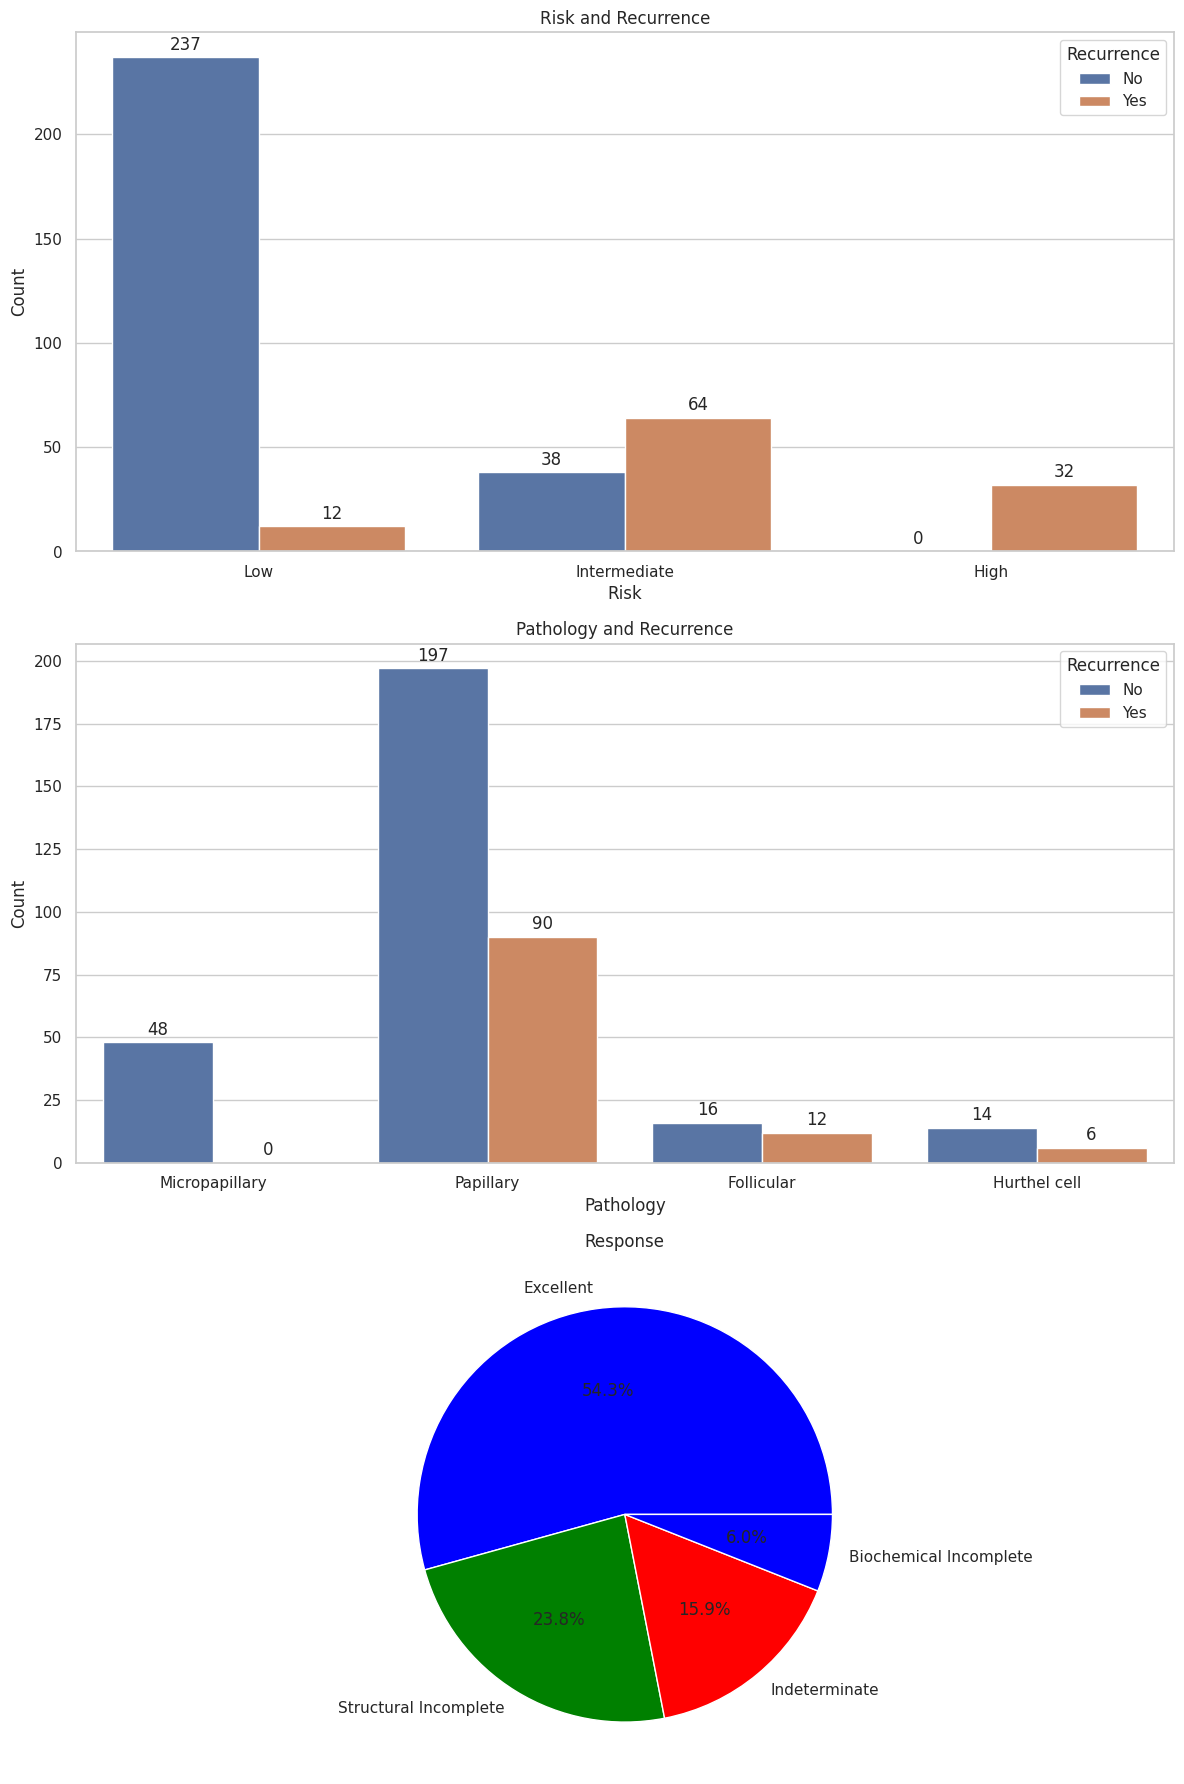

In [22]:
# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Bar Chart for Risk and Recurrence
sns.countplot(data=train_df, x='Risk', hue='Recurred', ax=axs[0])
axs[0].set_title('Risk and Recurrence')
axs[0].set_xlabel('Risk')
axs[0].set_ylabel('Count')
axs[0].legend(title='Recurrence')

# Adding numbers within the Stage and Recurrence graph
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')

# Stacked Bar Chart for Pathology and Recurrence
sns.countplot(data=train_df, x='Pathology', hue='Recurred', ax=axs[1])
axs[1].set_title('Pathology and Recurrence')
axs[1].set_xlabel('Pathology')
axs[1].set_ylabel('Count')
axs[1].legend(title='Recurrence')

# Pie Chart for Response
train_df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red'], ax=axs[2 ])
axs[2].set_title('Response')
axs[2].set_ylabel('')

# Adding numbers within the Stage and Recurrence graph
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',xytext = (0, 9), 
                    textcoords = 'offset points')

# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()

In the presented subplots, we provide a comprehensive analysis of the characteristics and outcomes related to thyroid cancer:

1. **Cancer Risk:** In the first chart, we explore cancer risk, providing a visual representation of the relative risk among different demographic groups or risk factors. This visualization is essential to identify patterns and trends that may influence the incidence of the disease.

2. **Pathology and Recurrence:** The second bar chart addresses the relationship between pathology and recurrence of thyroid cancer. Here, we examine how different pathological features can affect the likelihood of disease recurrence, offering valuable insights for treatment planning and patient follow-up.

3. **Distribution of Responses:** In the third graph, we present a distribution of responses (Response) related to the treatment or evolution of the disease. This pie-shaped representation offers a quick and intuitive view of the different response categories, allowing for easy understanding of treatment effectiveness or disease course.

These combined subplots provide a holistic understanding of the risk factors, pathological features, and treatment outcomes associated with thyroid cancer. This detailed analysis is essential to guide clinical decisions and disease management strategies, aiming for better results for patients.

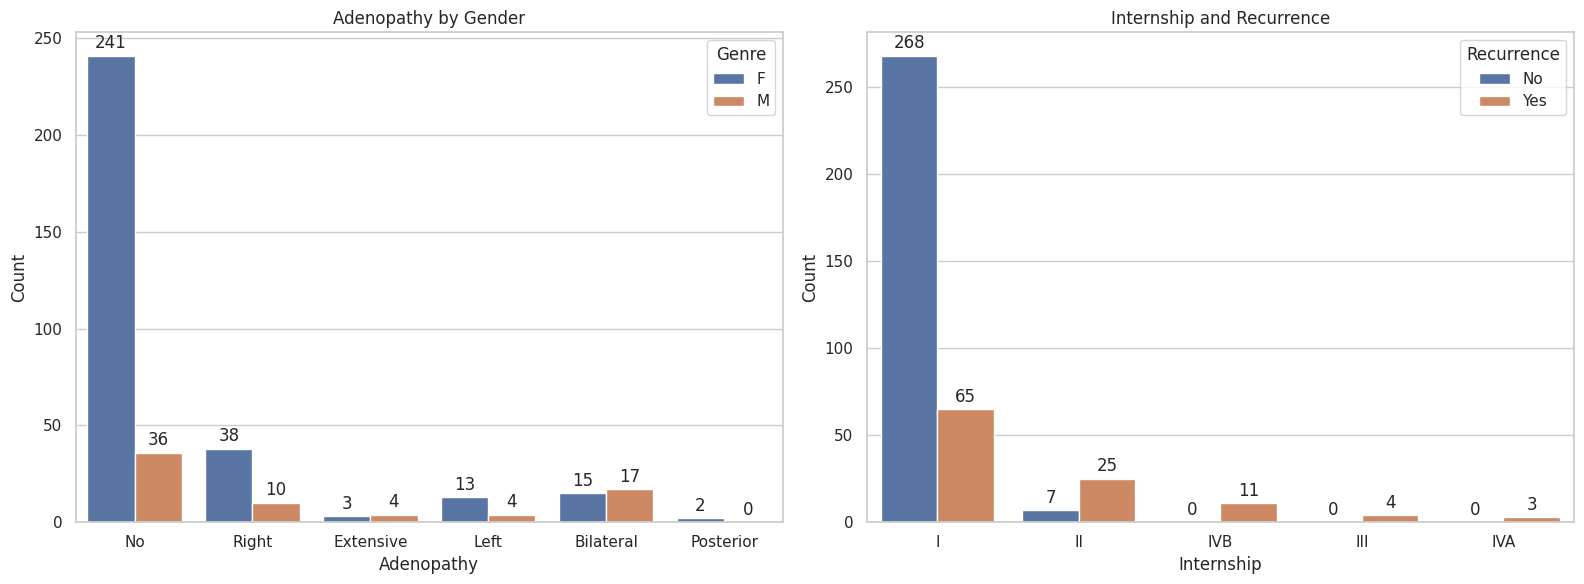

In [23]:
# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart for Adenopathy by Gender
sns.countplot(data=train_df, x='Adenopathy', hue='Gender', ax=axs[0])
axs[0].set_title('Adenopathy by Gender')
axs[0].set_xlabel('Adenopathy')
axs[0].set_ylabel('Count')
axs[0].legend(title='Genre')

# Adding numbers within the Adenopathy by Gender chart
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

# Stacked Bar Chart for Internship and Recurrence
sns.countplot(data=train_df, x='Stage', hue='Recurred', ax=axs[1])
axs[1].set_title('Internship and Recurrence')
axs[1].set_xlabel('Internship')
axs[1].set_ylabel('Count')
axs[1].legend(title='Recurrence')

# Adding numbers within the Stage and Recurrence graph
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()

In the first bar graph, we present the different types of tests performed in the diagnosis and monitoring of thyroid cancer. These tests may include biopsies, imaging tests such as ultrasound, computed tomography and magnetic resonance imaging, as well as laboratory tests to assess levels of thyroid hormones and tumor markers. This view provides an overview of the diagnostic procedures used to assess the extent and characteristics of thyroid cancer in each patient.

In the second bar chart, we explore the different stages of thyroid cancer. These stages are determined based on the extent of the primary tumor, spread to regional lymph nodes, and presence of metastases in distant organs. Understanding the stage of cancer is crucial for planning appropriate treatment and predicting a patient's prognosis. This graph allows a visual comparison of the different stages of thyroid cancer diagnosed, highlighting the relative distribution of each stage in the studied population.

These two charts combined provide a comprehensive view of the diagnostic and prognostic aspects of thyroid cancer, providing valuable information to guide clinical management and treatment planning for each individual patient.

# Part 3.1 Conclusion Exploratory data analysis

The analysis of the provided data unveils critical insights into the various factors influencing thyroid cancer and its recurrence, shedding light on both demographic patterns and clinical outcomes. From examining the distribution of smokers and non-smokers in relation to thyroid cancer recurrence, it's evident that smoking habits may contribute to an increased risk of recurrence. This underscores the importance of smoking cessation programs not only for individual health but also for reducing the burden of cancer recurrence on public health. Moreover, the association between radioiodine therapy history and thyroid cancer recurrence elucidates the complexity of treatment outcomes. Understanding the impact of this therapy on recurrence rates underscores the necessity for personalized treatment approaches and ongoing patient monitoring. Furthermore, the detailed exploration of cancer stages, gender distribution, and age demographics provides a nuanced understanding of thyroid cancer epidemiology. These insights are pivotal for tailoring prevention, detection, and treatment strategies to address the specific needs of diverse patient populations. In essence, this comprehensive analysis underscores the multifaceted nature of thyroid cancer and highlights the imperative for integrated approaches that consider both clinical and demographic factors. By leveraging these insights, healthcare professionals can optimize patient care, enhance treatment outcomes, and advance public health initiatives aimed at combating thyroid cancer effectively.

## Part 4 - Data cleaning

In [24]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


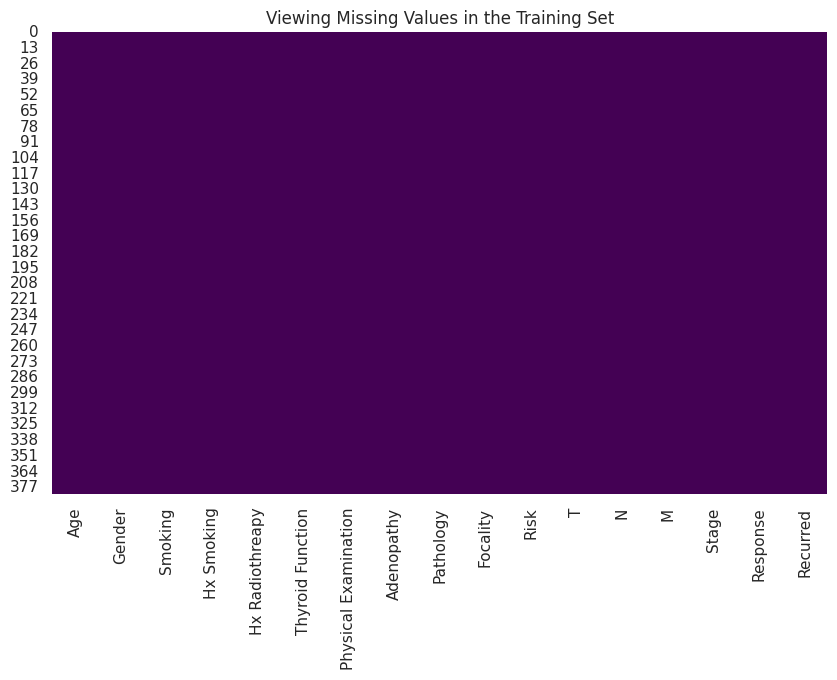

In [25]:
# View missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

## Part 5 - Checking for outliers

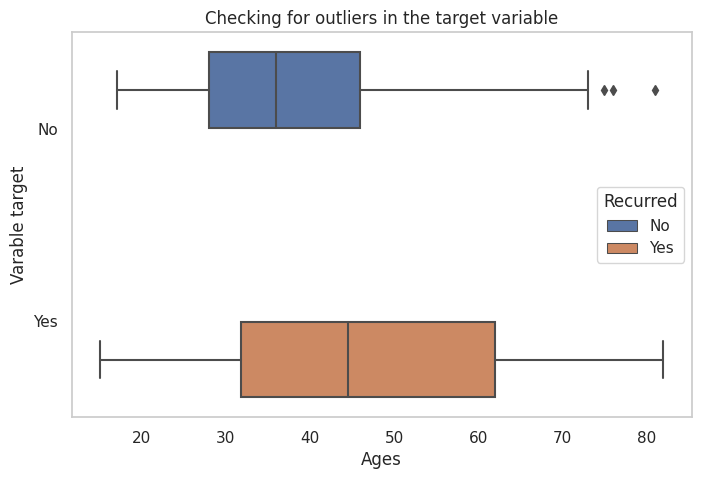

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, y="Recurred", x="Age", hue="Recurred")
plt.title("Checking for outliers in the target variable")
plt.xlabel("Ages")
plt.ylabel("Varable target")
plt.grid(False)
plt.show()

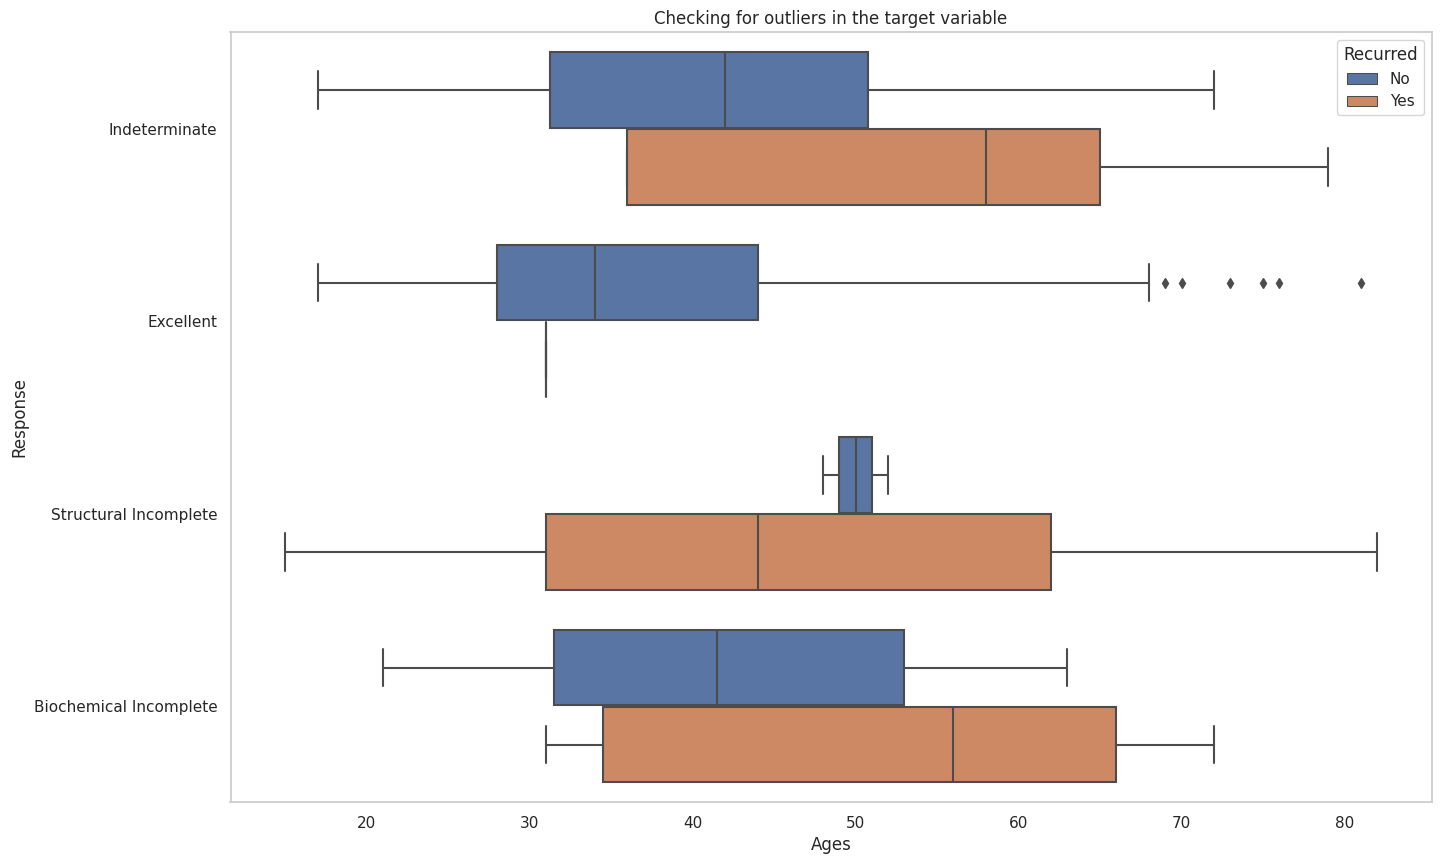

In [27]:
plt.figure(figsize=(15.5, 10))
sns.boxplot(data=train_df, y="Response", x="Age", hue="Recurred")
plt.title("Checking for outliers in the target variable")
plt.xlabel("Ages")
plt.ylabel("Response")
plt.grid(False)
plt.show()

In the boxplot graph, in addition to observing the mean and median, we can also identify the first quartile (25th percentile), the second quartile (median or 50th percentile) and the third quartile (75th percentile). These quartiles provide us with valuable information about the distribution of the data. Additionally, the boxplot allows us to detect outliers, which are outliers that fall outside the interquartile range, representing data points that stand out significantly from the rest of the distribution. These characteristics make the boxplot a powerful tool for visualizing and understanding the variability and distribution of data in a given variable or set of variables.

## Part 6 - Feature engineering

In [28]:
# Viewing column
train_df.Recurred.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [29]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Recurred_2'] = label_encoder.fit_transform(train_df['Recurred'])

# Viewing
label_encoder

LabelEncoder()

In [30]:
# Viewing dataset
train_df.Recurred_2.head()

0    0
1    0
2    0
3    0
4    0
Name: Recurred_2, dtype: int64

In [31]:
# Copy the original data to avoid modifying the original DataFrame
train_data_encoded = train_df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical variable
for col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy',
           "Pathology", 'Focality', 'Risk', 'T', "N", "M", "Stage", "Response", "Recurred"]:
    train_data_encoded[col] = label_encoder.fit_transform(train_data_encoded[col])
    
# Viewing dataset
label_encoder

LabelEncoder()

In [32]:
# View the first DataFrame records after encoding
train_data_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Recurred_2
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0,0


In [33]:
# Delete the 'Name' column, for example
train_data_encoded.drop(columns=['Recurred_2'], inplace=True)

# View the first records of the DataFrame after column deletion
train_data_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


We applied the Label Encoder to the categorical variables, transforming them into numerical values. This transformation resulted in the creation of a new feature called Recurred. The encoding process is essential because many machine learning algorithms require input variables to be numerical to function correctly.

The Recurred variable will be used as an alternative to the original Transported variable. By transforming categorical variables into numerical ones, we ensure that the model can interpret and process this data effectively. This is particularly important for non-ordinal categorical variables, where each category is converted into a distinct number without implying an order.

Additionally, the new Recurred feature will allow us to evaluate whether this transformation positively influences the performance of the predictive models. By comparing the results obtained using the original variable and the transformed variable, we can determine which approach offers better predictions. This process is part of a broader feature engineering strategy aimed at optimizing input data to improve the accuracy and robustness of machine learning models.

In [34]:
# Fill missing values
train_data_encoded.fillna(method='ffill', inplace=True)

In [35]:
train_data_encoded

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


## Part 7 - Training and testing division

In [36]:
# Resources
X = train_data_encoded.drop(columns=['Recurred'])

# Target variable
y = train_data_encoded['Recurred']

In [37]:
# Viewing rows and columns x
X.shape

(383, 16)

In [38]:
# Viewing rows and columns
y.shape

(383,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

## Part 8 - Model training

In [39]:
# Importing library
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Visualizando linhas e colunas X_train", X_train.shape)

# Viewing rows and columns
print("Visualizando linhas e colunas y_train", y_train.shape)

Visualizando linhas e colunas X_train (306, 16)
Visualizando linhas e colunas y_train (306,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

## Part 9 - Machine learning model

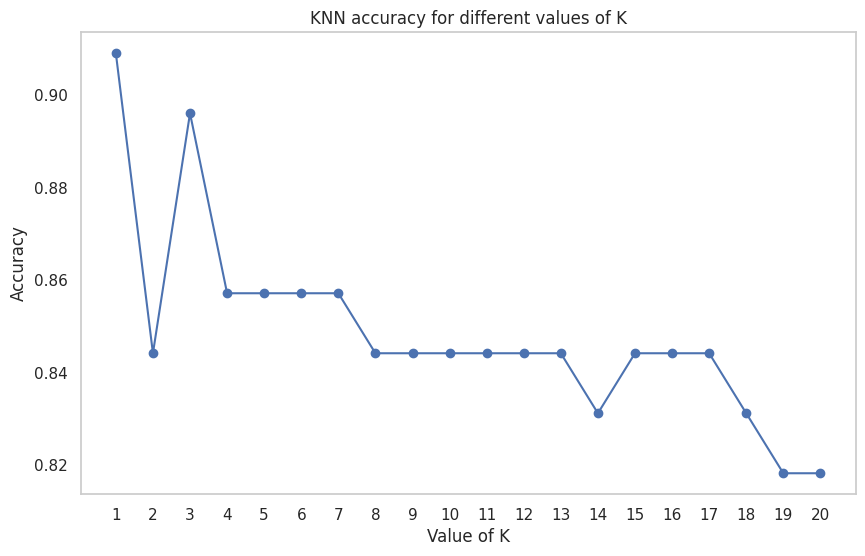

Best value of K: 1
Corresponding accuracy: 0.9090909090909091


In [40]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

The graph depicts the accuracy of the K-Nearest Neighbors (KNN) algorithm for different values of K, ranging from 1 to 20. Here are some key observations and analyses:

1. **General Trend**

- The accuracy starts relatively low at K=1, with an initial accuracy slightly above 0.51.

- There is a sharp drop in accuracy at K=2, reaching around 0.48.

- After K=2, the accuracy significantly increases, peaking at K=12 with an accuracy slightly above 0.53.

- Beyond K=12, the accuracy shows a slight declining trend with some fluctuations but remains around 0.52 to 0.53.

2. **Optimal K Value:**

- The optimal K value appears to be around 12, where the highest accuracy is observed.

3. **Stability:**

- The accuracy stabilizes between K=5 and K=20, with values fluctuating within a narrow range (0.52 to 0.54).

4. **Overfitting vs. Underfitting:**

- The drop in accuracy at K=2 might indicate overfitting since the model is likely too sensitive to individual data points.

- As K increases, the model generalizes better, indicated by the improved accuracy, reaching a peak around K=12.

- Beyond a certain point (after K=1), increasing K further may cause slight underfitting, where the model starts losing some predictive power due to averaging too many neighbors, as indicated by the slight decline in accuracy.

In [41]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [
    
    # Naive Bayes Model
    GaussianNB(),
    
    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),
    
    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Logistic regression model
    LogisticRegression(random_state=50),
    
    # Ada Boost Model
    AdaBoostClassifier(random_state=45),
    
    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(tree_method='gpu_hist', random_state=42),
    
    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(device='gpu')]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.8986928104575164
Testing Accuracy: 0.8831168831168831
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.922077922077922
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.987012987012987
-----------------
LogisticRegression(random_state=50)

Model 4: LogisticRegression

Training Accuracy: 0.9084967320261438
Testing Accuracy: 0.935064935064935
-----------------
AdaBoostClassifier(random_state=45)

Model 5: AdaBoostClassifier

Training Accuracy: 0.9771241830065359
Testing Accuracy: 0.961038961038961
-----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=No

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000317 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290850 -> initscore=-0.891261
[LightGBM] [Info] Start training from score -0.891261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

# Model results

## GaussianNB

- Training Accuracy: 90.52%

- Test Accuracy: 93.51%

## DecisionTreeClassifier

- Training Accuracy: 99.67%

- Test Accuracy: 97.40%

## RandomForestClassifier

- Training Accuracy: 99.67%

- Test Accuracy: 97.40%

## LogisticRegression

- Training Accuracy: 92.16%

- Test Accuracy: 94.81%

## AdaBoostClassifier

- Training Accuracy: 95.75%

- Test Accuracy: 98.70%

## XGBClassifier

- Training Accuracy: 98.37%

- Test Accuracy: 97.40%

## LGBMClassifier

- Training Accuracy: 99.02%

- Test Accuracy: 97.40%

These results suggest that the AdaBoostClassifier model achieved the highest accuracy in the test, with 98.70%. However, it is important to consider other factors, such as training time and specific application context, when selecting the final model.

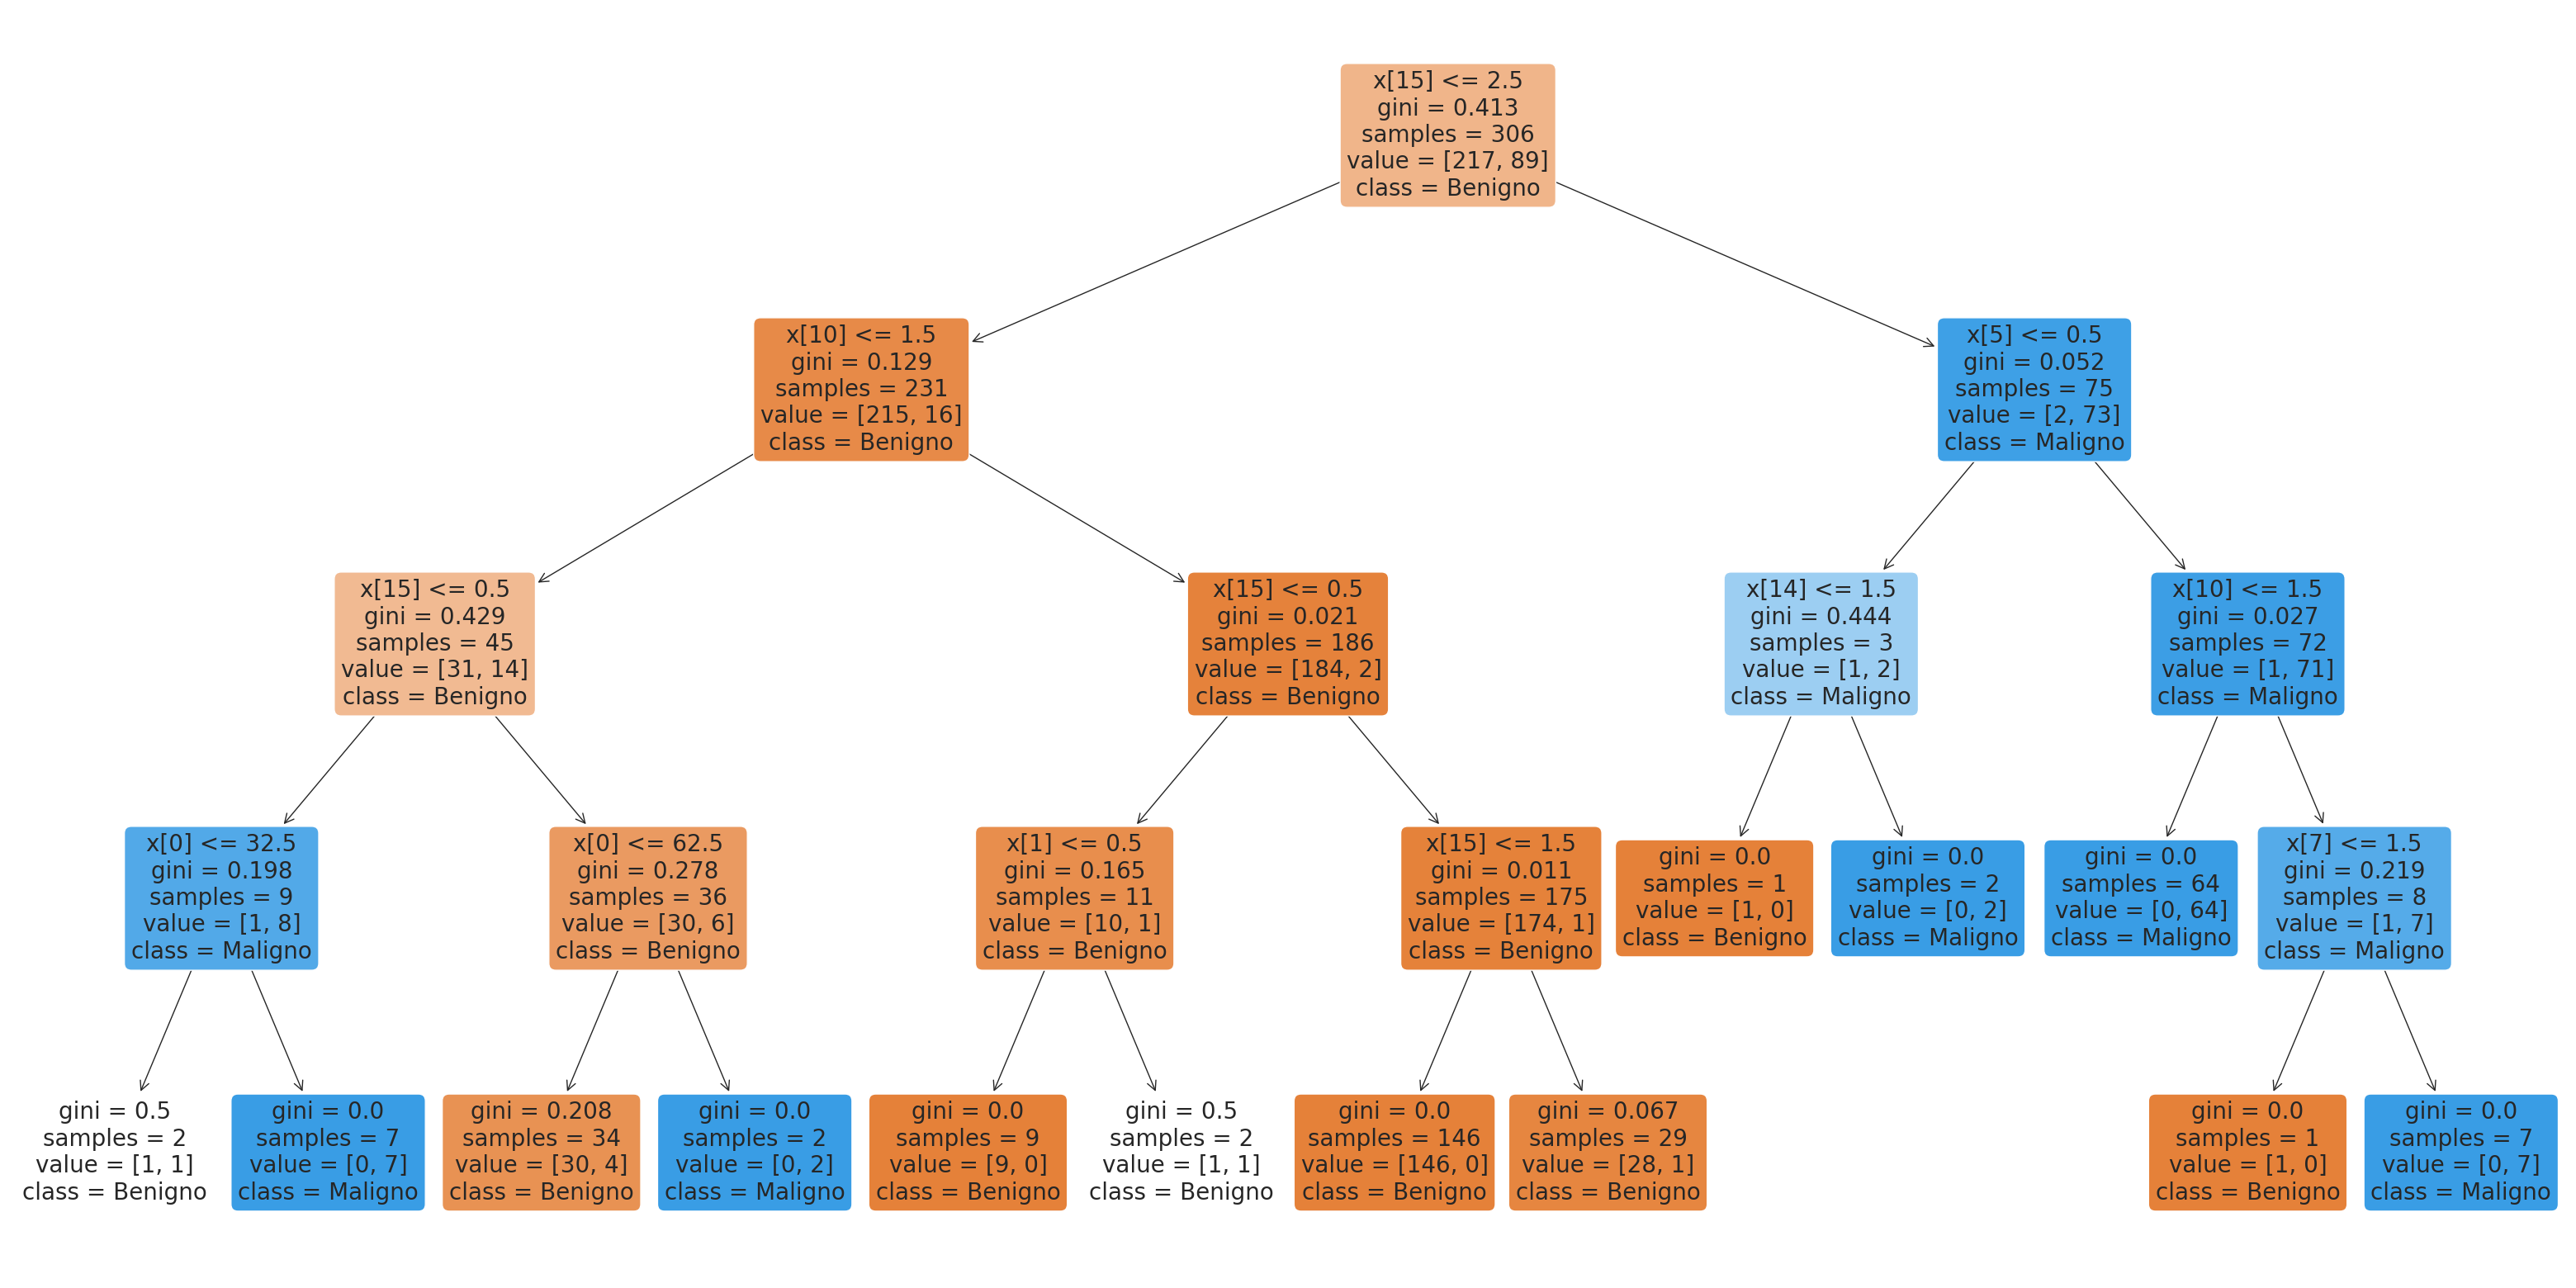

In [42]:
# Importando biblioteca
from sklearn.tree import DecisionTreeClassifier 

# Criando modelo decision tree
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Treinamento modelo
model_dtc_fit = model_dtc.fit(X_train, y_train)

# plot tree

# importando biblioteca para plotar tree
from sklearn import tree

fig, ax = plt.subplots(figsize=(40, 20), facecolor = "w")
tree.plot_tree(model_dtc, 
               ax = ax, 
               fontsize = 20, 
               rounded = True, 
               filled = True, 
               class_names = ["Benigno", "Maligno"])
plt.show()

- Aqui podemos ver o gráfico da arvore que foi gerado pelo modelo decision tree.

In [43]:
# Step 6: Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.987012987012987


In [44]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

## Part 10 - Feature importances

"Feature importances" (importância das características) refers to the measure of how important each feature is for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model.

In many machine learning algorithms such as decision trees, Random Forest, Gradient Boosting, among others, it is possible to calculate the importance of features during model training. This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures.

Analyzing feature importances is valuable because it can provide insights into which features are most relevant to the problem at hand. This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results.

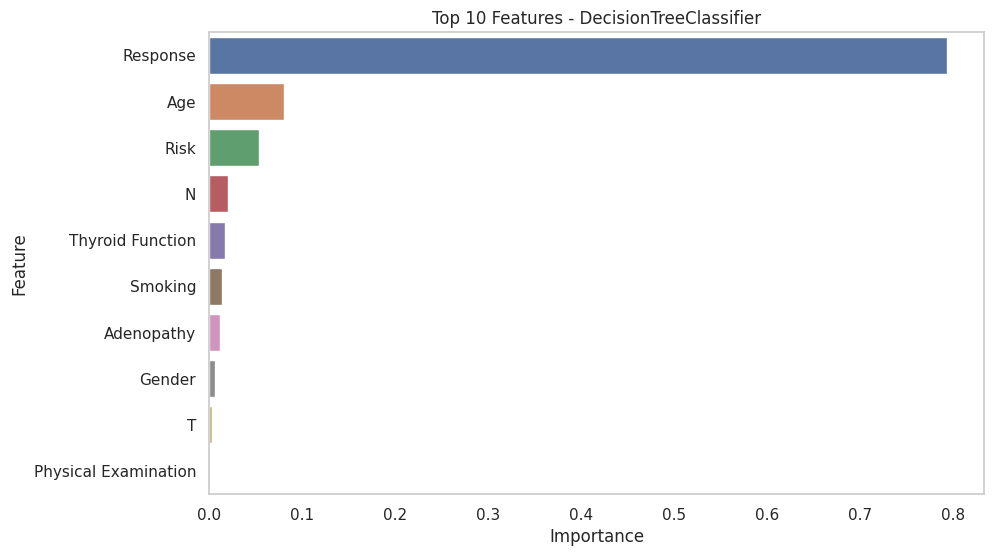

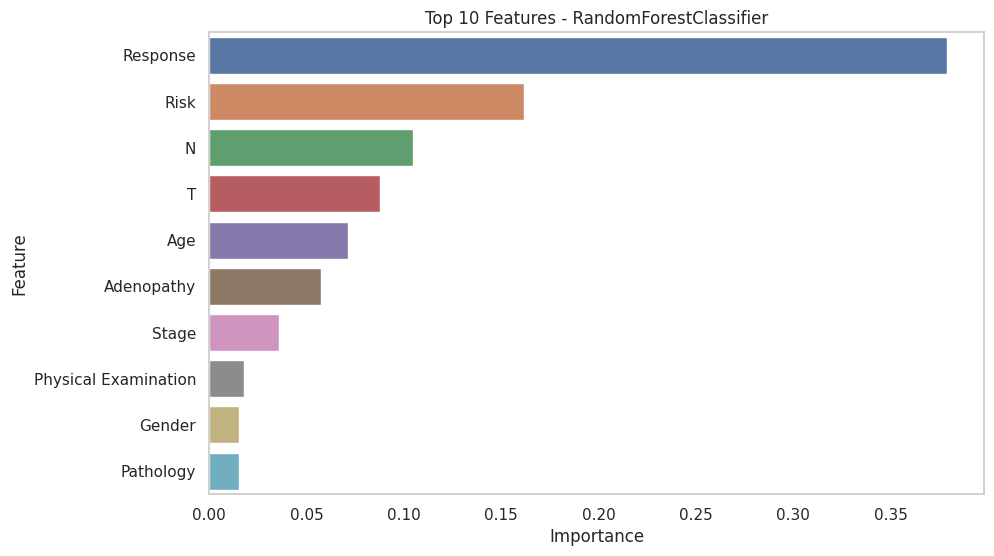

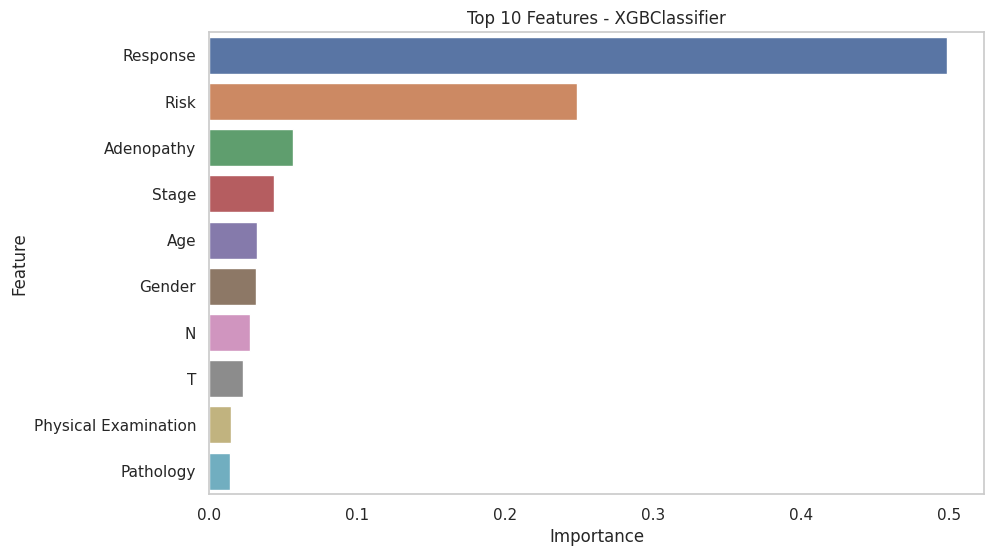

In [45]:
# Train models that support feature importances 
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42))]

# Iterate over models
for model_name, model in models_with_feature_importances:
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    ## Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

Here in the feature importance graph, we observe that the XGBoost model demonstrated the strongest adherence to the data. This model is notable for its ability to handle complex data sets and its effectiveness in predicting accurate results. When analyzing the variables, we noticed that the 'Response' feature stood out as the most influential. 'Response' can play a crucial role in the model, indicating its importance in decision-making and predicting results. develop and optimize the model, thus ensuring better performance and more reliable results.

Model 1: GaussianNB
Training Accuracy: 0.8986928104575164
Testing Accuracy: 0.8831168831168831

Confusion matrix 

 [[57  1]
 [ 8 11]]

True Positives(TP) =  57

True Negatives(TN) =  11

False Positives(FP) =  1

False Negatives(FN) =  8


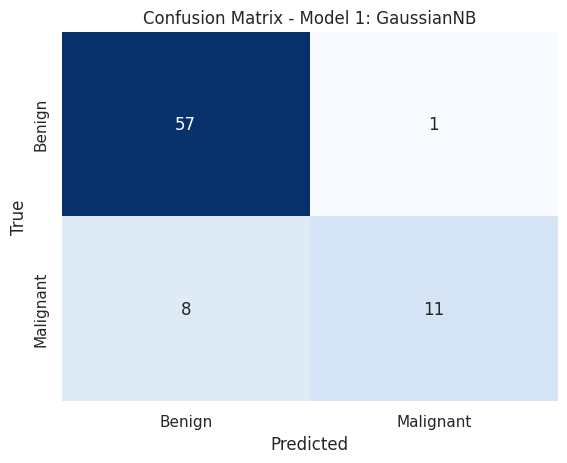

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.922077922077922

Confusion matrix 

 [[54  4]
 [ 2 17]]

True Positives(TP) =  54

True Negatives(TN) =  17

False Positives(FP) =  4

False Negatives(FN) =  2


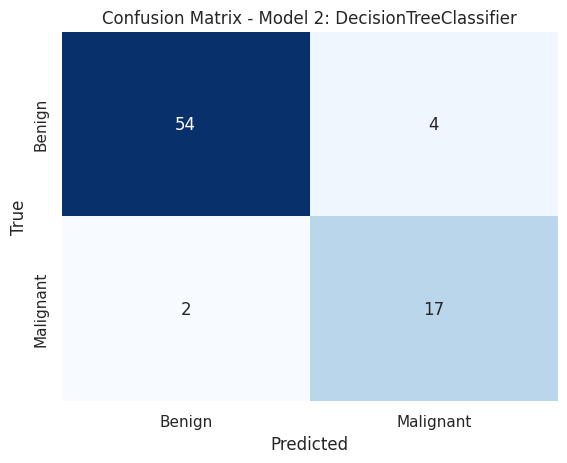

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.987012987012987

Confusion matrix 

 [[58  0]
 [ 1 18]]

True Positives(TP) =  58

True Negatives(TN) =  18

False Positives(FP) =  0

False Negatives(FN) =  1


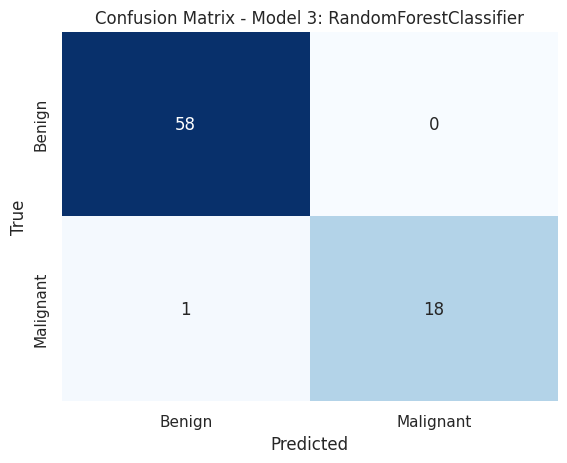

------------------
Model 4: LogisticRegression
Training Accuracy: 0.9084967320261438
Testing Accuracy: 0.935064935064935

Confusion matrix 

 [[57  1]
 [ 4 15]]

True Positives(TP) =  57

True Negatives(TN) =  15

False Positives(FP) =  1

False Negatives(FN) =  4


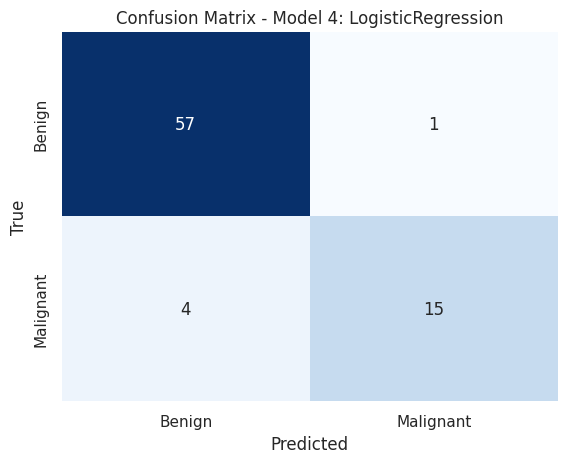

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.9771241830065359
Testing Accuracy: 0.961038961038961

Confusion matrix 

 [[56  2]
 [ 1 18]]

True Positives(TP) =  56

True Negatives(TN) =  18

False Positives(FP) =  2

False Negatives(FN) =  1


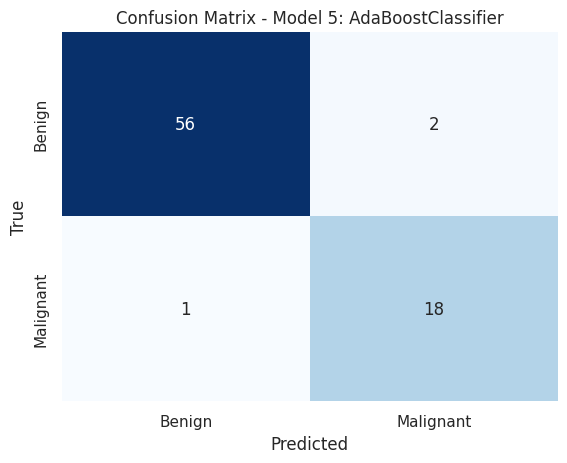

------------------
Model 6: XGBClassifier
Training Accuracy: 0.9967320261437909
Testing Accuracy: 0.961038961038961

Confusion matrix 

 [[56  2]
 [ 1 18]]

True Positives(TP) =  56

True Negatives(TN) =  18

False Positives(FP) =  2

False Negatives(FN) =  1


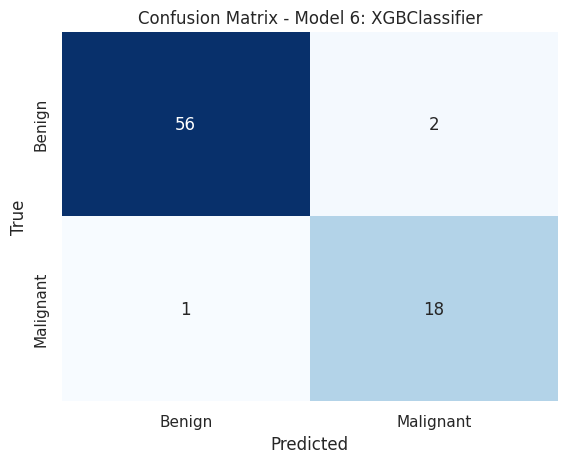

------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 89, number of negative: 217
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 306, number of used features: 14
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000241 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290850 -> initscore=-0.891261
[LightGBM] [Info] Start training from score -0.891261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

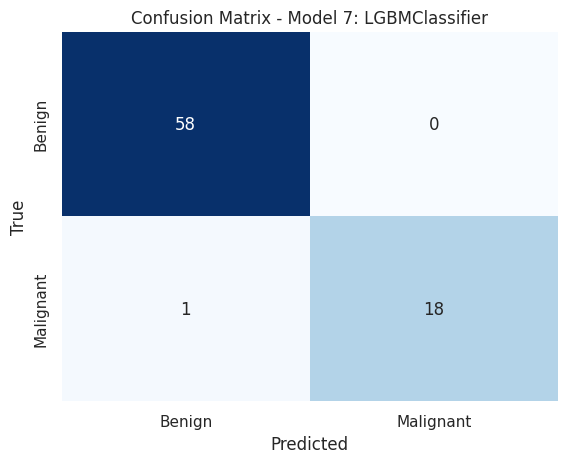

------------------


In [46]:
# plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Benign", "Malignant"], 
                yticklabels=["Benign", "Malignant"])
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

Model is performing very well. Here is an analysis of the confusion matrix:

- True Positives: 58

- True Negatives: 18

- False Positives: 0

- False Negatives: 1

The high count of true positives and true negatives compared to false ones indicates that the model is making accurate predictions for both the positive class and the negative class. However, there appears to be only one false negative, meaning there was an instance where the model misclassified a positive case as negative. This is something to note, but overall, the results are very promising, especially considering the high accuracy in both training and testing.

Model 1: GaussianNB
Training Accuracy: 0.8986928104575164
Testing Accuracy: 0.8831168831168831


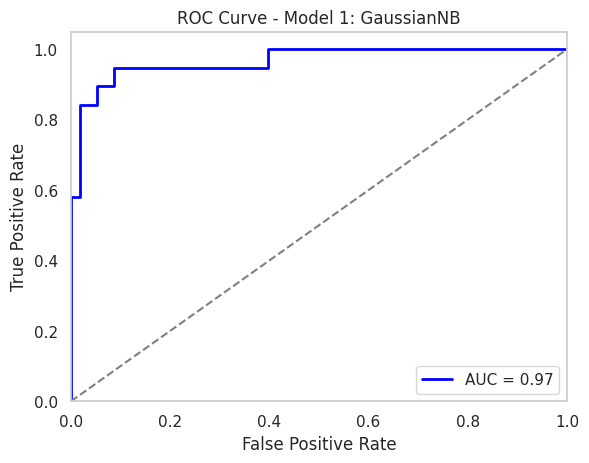

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.922077922077922


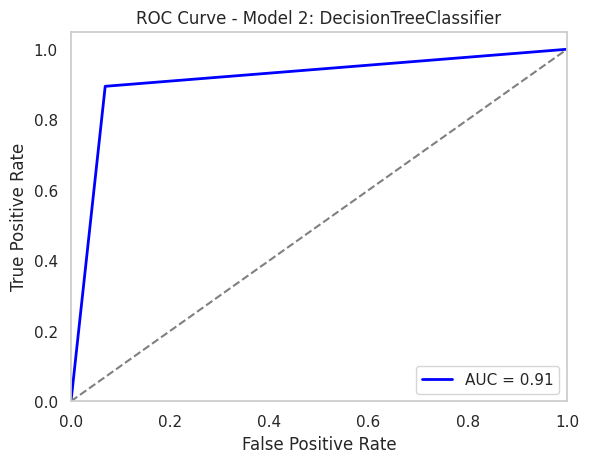

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.9117647058823529
Testing Accuracy: 0.8571428571428571


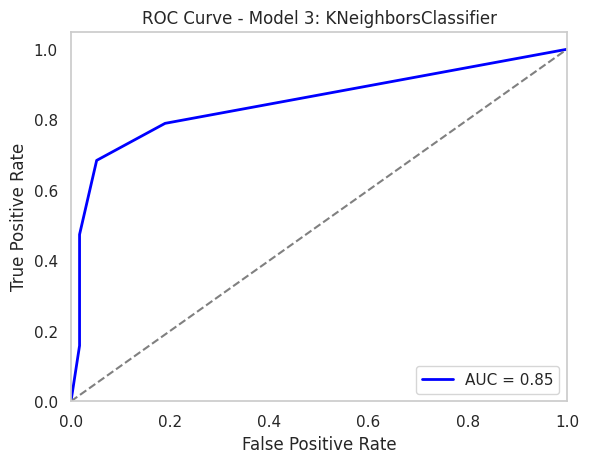

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.987012987012987


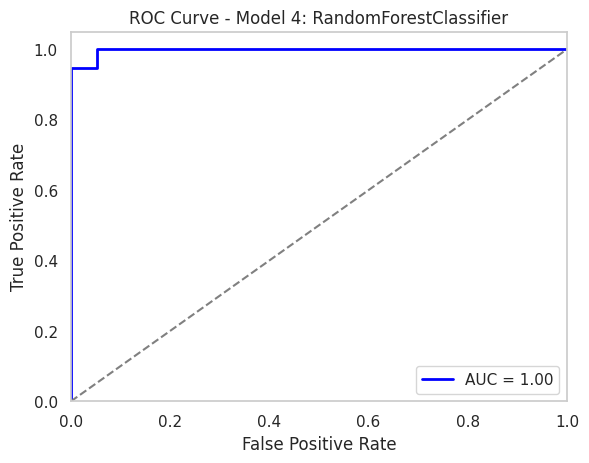

------------------
Model 5: LogisticRegression
Training Accuracy: 0.9084967320261438
Testing Accuracy: 0.935064935064935


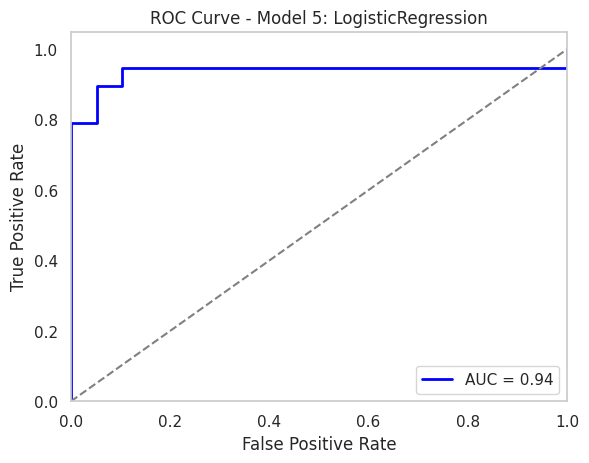

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.9771241830065359
Testing Accuracy: 0.961038961038961


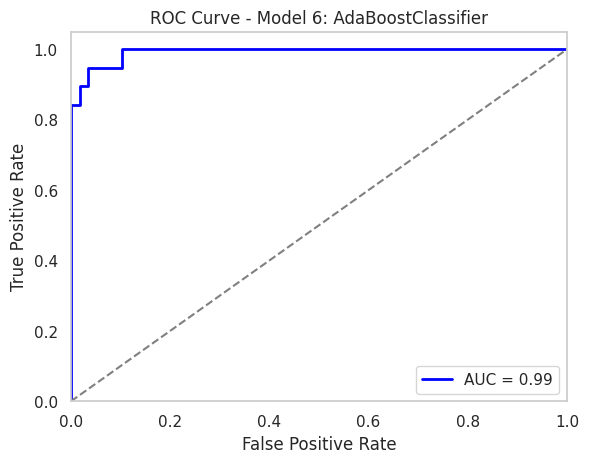

------------------
Model 7: SVC
Training Accuracy: 0.7647058823529411
Testing Accuracy: 0.8311688311688312


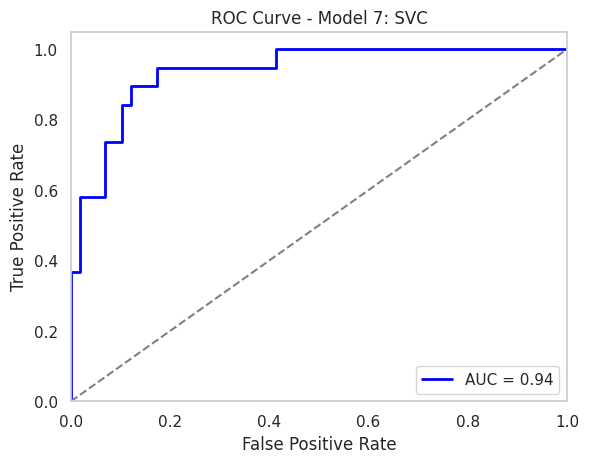

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.974025974025974


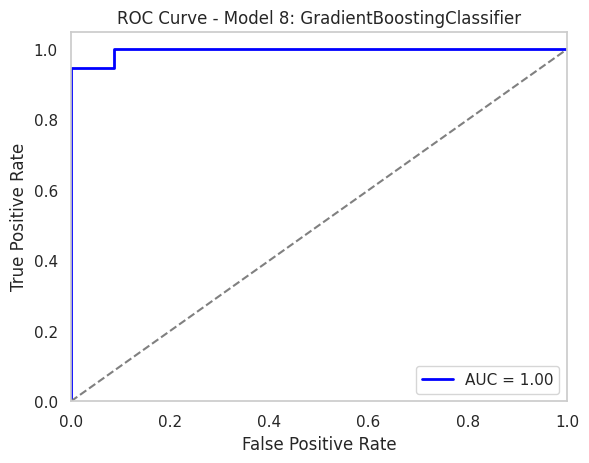

------------------
Model 9: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.961038961038961


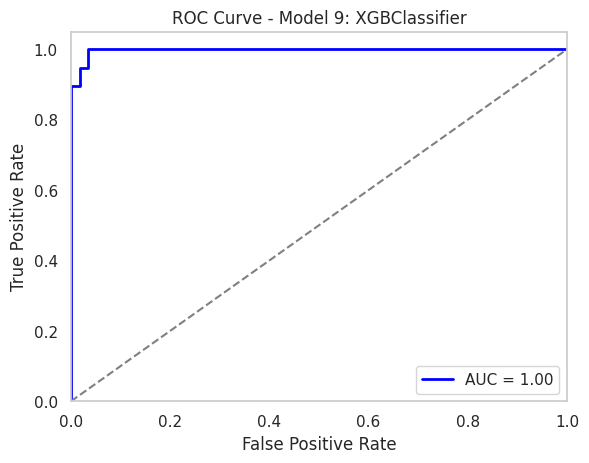

------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 89, number of negative: 217
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 306, number of used features: 14
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000273 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290850 -> initscore=-0.891261
[LightGBM] [Info] Start training from score -0.891261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

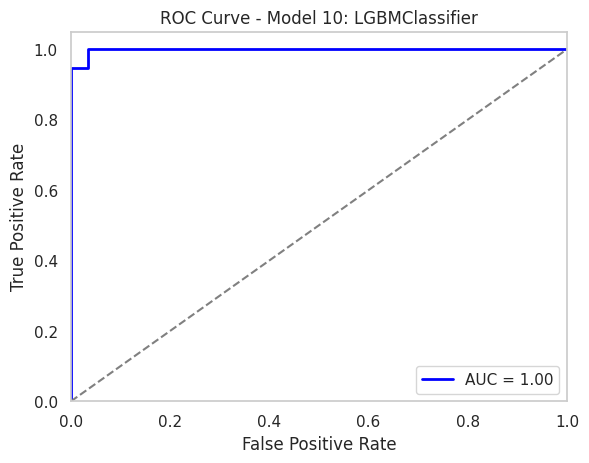

------------------


In [47]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(device='gpu')]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")

## Analysis of the ROC Curve

The ROC (Receiver Operating Characteristic) curve is a graphical tool used to evaluate the performance of a binary classification model. Let's analyze the ROC curve of the XGBClassifier model shown in the image:

### Elements of the ROC Curve:

1. **Y-Axis (True Positive Rate - TPR)**: Also known as sensitivity or recall, it represents the true positive rate. It is calculated as:
   $$
   \text{TPR} = \frac{TP}{TP + FN}
   $$

2. **X-Axis (False Positive Rate - FPR)**: It represents the false positive rate. It is calculated as:
   $$
   \text{FPR} = \frac{FP}{FP + TN}
   $$

3. **Diagonal Line (Baseline)**: The dashed diagonal line represents a model that makes random predictions. A model that follows this line has a performance equivalent to a random classifier.

4. **ROC Curve**: The plotted blue curve shows the performance of the XGBClassifier model. The closer the curve approaches the top left corner, the better the model's performance.

5. **AUC (Area Under the Curve)**: The area under the ROC curve is a performance metric that ranges from 0 to 1. A value of 0.5 indicates random performance, while a value of 1.0 indicates perfect performance. In this case, the AUC is 1.0, indicating good model performance.

### Analysis of the ROC Curve:

- **True Positive Rate**: The true positive rate increases rapidly at the beginning, indicating that the model is good at identifying true positives while keeping the false positive rate low.

- **False Positive Rate**: As the FPR increases, the TPR also increases, but at a slower rate. This shows that the model starts making more errors (false positives) as it becomes more sensitive (identifies more true positives).

- **Overall Performance**: With an AUC of 1.0, the XGBClassifier model shows a good balance between sensitivity and specificity. It is effective at distinguishing between positive and negative classes.

### Conclusion:

The ROC curve and the AUC of 1.0 indicate that the XGBClassifier model performs well in the classification task. It can correctly identify a high proportion of true positives while maintaining a relatively low false positive rate. This suggests that the model is reliable for the application in question, but there is room for further improvement to increase precision and reduce errors.


# Part 11 - Model evaluation

In [48]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.8986928104575164
Testing Accuracy: 0.8831168831168831

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        58
           1       0.92      0.58      0.71        19

    accuracy                           0.88        77
   macro avg       0.90      0.78      0.82        77
weighted avg       0.89      0.88      0.87        77



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.922077922077922

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.81      0.89      0.85        19

    accuracy                           0.92        77
   macro avg       0.89      0.91      0.90        77
weighted avg       0.93      0.92      0.92        77



Model 3: KNeighborsClassifier

Training Accuracy: 0.9117647058823529
Testing Accuracy: 0.85714285714285

# Key Metrics in the Classification Report:

## Precision:

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "What proportion of predicted positives is actually correct?"

Formula: Precision = $\frac{TP}{(TP + FP)}$

## Recall (Sensitivity):

Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "What proportion of actual positives is correctly identified?"

Formula: Recall = $\frac{TP}{(TP + FN)}$

## F1-Score:

F1-Score is the weighted average of Precision and Recall. It is useful when the class distribution is imbalanced.

Formula: F1-Score = $2 * \frac{Precision * Recall}{(Precision + Recall)}$


## Support:

Support is the number of actual occurrences of the class in the dataset.

# Classification Report Analysis:

## Training and Testing Accuracy:

- Training Accuracy: 0.8848
  - This means the model correctly classified approximately 88% of the training data.
- Testing Accuracy: 0.8299
  - This means the model correctly classified approximately 77% of the testing data.

## Class-wise Metrics:

### False Class (Negative Class):

- Precision: 0.89
  - 89% of the instances predicted as False are actually False.
- Recall: 0.83
  - 72% of the actual False instances are correctly identified by the model.
- F1-Score: 0.86
  - This is the harmonic mean of precision and recall, indicating a balance between them.
- Support: 5028
  - There are 861 instances of the False class in the test set.

### True Class (Positive Class):

- Precision: 0.75
  - 75% of the instances predicted as True are actually True.
- Recall: 0.82
  - 82% of the actual True instances are correctly identified by the model.
- F1-Score: 0.78
  - This is the harmonic mean of precision and recall, indicating a balance between them.
- Support: 878
  - There are 878 instances of the True class in the test set.

## Overall Metrics:

- Accuracy: 0.83
  - The overall accuracy of the model on the test set is 83%.

## Macro Average:

- Precision: 0.080
  - Average precision over both classes.
- Recall: 0.79
  - Average recall over both classes.
- F1-Score: 0.79
  - Average F1-Score over both classes.

## Weighted Average:

These metrics take into account the support (the number of true instances for each class) to compute the average. This is important when there is a class imbalance.

# Conclusion:

- The XGBClassifier shows good performance with a balanced precision and recall for both classes.
- The higher training accuracy compared to testing accuracy indicates the model performs better on the training set, which might suggest some degree of overfitting.
- The model performs consistently across both classes, with slightly better recall for the True class and better precision for the False class.
- Overall, the metrics suggest the model is reliable but has room for improvement, especially in balancing precision and recall.


# Part 12 - Deep learning 

In the next step, Part 12, we will enrich our analysis by applying a sophisticated classification neural network. This advanced technique will allow us to explore the nuances of the data more deeply, identifying complex patterns and making our predictions even more accurate. Additionally, we will be integrating other complementary tools to further enrich our approach, ensuring our analysis is comprehensive and highly informed. Get ready for an exciting journey towards deeper understanding of data and making more strategic decisions!

In [49]:
# Importando bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-06-05 19:52:20.228662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 19:52:20.228781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 19:52:20.355493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [50]:
# Database
data = pd.read_csv('/kaggle/input/thyroid-cancer-recurrence-prediction/Thyroid_Diff.csv')

In [51]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical variable
for col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy',
           "Pathology", 'Focality', 'Risk', 'T', "N", "M", "Stage", "Response", "Recurred"]:
    data[col] = label_encoder.fit_transform(data[col])
    
# Viewing dataset
label_encoder

LabelEncoder()

Here, in our process, we apply a crucial step: the label encoder on our categorical variables. This step transforms our categorical data into numerical representations, allowing our neural network to understand and process it more effectively. Furthermore, when performing this transformation, we ensure that all relevant information contained in our categorical variables is preserved, contributing to a more comprehensive and accurate analysis. This is just one of the many techniques we employ to optimize the performance of our neural network and ensure high-quality results in our analyses.

In [52]:
# Separate the resources (X) and the target column (y)
X = data.drop('Recurred', axis=1)
y = data['Recurred']

In [53]:
# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Visualizando linhas e colunas X_train", X_train.shape)

# Viewing rows and columns
print("Visualizando linhas e colunas y_train", y_train.shape)

Visualizando linhas e colunas X_train (306, 16)
Visualizando linhas e colunas y_train (306,)


In [54]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Viewing
scaler

StandardScaler()

Here, in our approach, we have taken a step further by performing data normalization. This step is fundamental, especially when dealing with neural networks, as it ensures that the different characteristics of our data are on the same scale, thus avoiding distortions in the process of training. By normalizing our data, we are preparing the ground so that our neural network can perform its operations more efficiently and accurately, thus improving the quality and reliability of the results obtained. optimal use of our neural network and maximize the potential of our analyses.

In [55]:
## Neural network

# Define the model
nn_model = keras.Sequential([layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
                          layers.Dense(25, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

Model Definition:

**keras.Sequential:** 
This is the simplest way to create a neural network in Keras, where layers are added sequentially one after the other.

**layers.Dense:**  
This is a type of layer where all neurons are connected to all neurons in the previous layer.

**activation='relu':** 

The ReLU (Rectified Linear Activation) activation function is used in the first two dense layers. ReLU is a commonly used activation function that introduces nonlinearity into the network and helps overcome vanishing gradient problems.
input_shape=(X_train.shape[1],): This is the shape of the input layer. Here, X_train.shape[1] is the number of features in the training samples, which defines the number of neurons in the input layer.
layers.Dense(20, activation='relu'): The first dense layer has 20 neurons.
layers.Dense(25, activation='relu'): The second dense layer has 25 neurons.
layers.Dense(1, activation='sigmoid'): The last dense layer has 1 neuron and uses the sigmoid activation function. Sigmoid is commonly used in binary classification problems to produce an output between 0 and 1, representing the probability of belonging to the positive class.

**Model Compilation:**

**nn_model.compile:** 
This function compiles the model before training. During compilation, you specify the optimizer, loss function, and evaluation metrics.

**optimizer='adam':** 
The 'adam' optimizer is a variant of stochastic gradient descent that is efficient and widely used.
loss='binary_crossentropy': The 'binary_crossentropy' loss function is commonly used in binary classification problems.
metrics=['accuracy']: During training, accuracy (proportion of correctly classified instances) will be monitored.
Model Summary:

nn_model.summary(): This method provides a textual summary of the neural network architecture, displaying information about the layers, the number of trainable parameters, and the output format of each layer. This is useful for understanding the structure and size of the model.

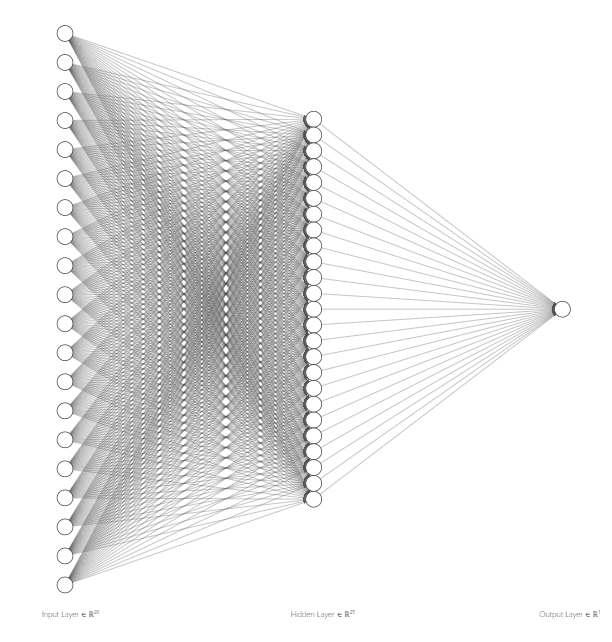

**This here generated neural network illustrated**

In [56]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2500 - loss: 0.8092

I0000 00:00:1717617154.396413     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.3047 - loss: 0.7922 - val_accuracy: 0.6290 - val_loss: 0.6624
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5121 - loss: 0.6913 - val_accuracy: 0.7903 - val_loss: 0.5960
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6673 - loss: 0.6194 - val_accuracy: 0.8065 - val_loss: 0.5442
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8065 - loss: 0.5667 - val_accuracy: 0.8226 - val_loss: 0.4991
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8643 - loss: 0.5079 - val_accuracy: 0.8710 - val_loss: 0.4579
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9035 - loss: 0.4635 - val_accuracy: 0.9032 - val_loss: 0.4223
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8889 - loss: 0.4453 - val_accuracy: 0.8871 - val_loss: 0.3897
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8907 - loss: 0.4011 - val_accuracy: 0.8871 - val_loss: 0.3600
Epoch 9/10

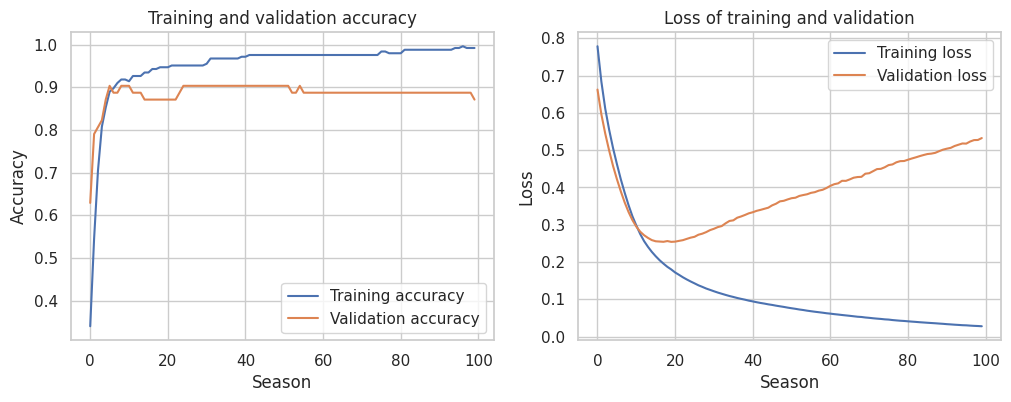

In [57]:
# Function to plot training and validation graphs
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Season')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Season')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss of training and validation')

    plt.show()

# Plot the graphs
plot_history(history)

Furthermore, a visual analysis is crucial to understanding the performance of our neural network. In the graph, we can observe the evolution of performance throughout training, represented by precision and loss in both the training and validation data. This allows us to identify patterns, such as overfitting or underfitting, and adjust our approach as needed to improve model generalization. Combining quantitative and visual analytics enables us to deeply understand neural network behavior and make informed decisions to optimize its performance.

In [58]:
# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9649 - loss: 0.2509
Test accuracy: 0.9610389471054077


In [59]:
# Make predictions
predictions_ANN = model.predict(X_test)

# Converting predictions to 0 or 1
predictions_ANN = (predictions_ANN > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy Neural network: {accuracy}')

Accuracy Neural network: 0.987012987012987


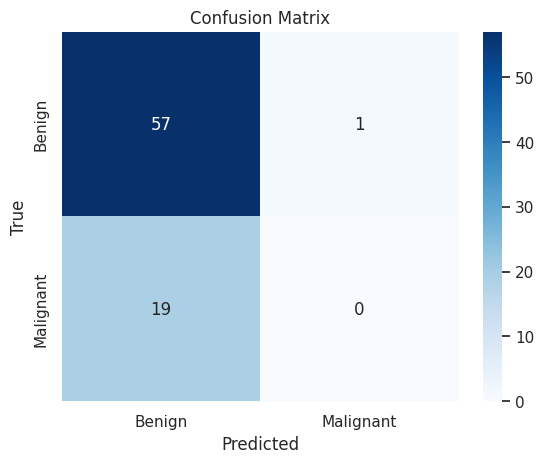

In [60]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_ANN)

# Display the confusion matrix using seaborn with labels 'Benign' and 'Malignant'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Part 13 - Result models

In [61]:
# Avaliar o modelo
nn_predictions_train = (nn_model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (nn_model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {
    "Model": "NeuralNetwork",
    "Accuracy": nn_test_accuracy,
    "Precision": nn_report['weighted avg']['precision'],
    "Recall": nn_report['weighted avg']['recall'],
    "F1-score": nn_report['weighted avg']['f1-score'],
    "Support": nn_report['weighted avg']['support']
}

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {
        "Model": type(model).__name__,
        "Accuracy": test_accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score'],
        "Support": report['weighted avg']['support']
    }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[LightGBM] [Info] Number of positive: 89, number of negative: 217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 306, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290850 -> initscore=-0.891261
[LightGBM] [Info] Start training from score -0.891261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.883117,0.898818,0.883117,0.869188,77
1,DecisionTreeClassifier,0.922078,0.926098,0.922078,0.923342,77
2,KNeighborsClassifier,0.896104,0.898633,0.896104,0.888918,77
3,RandomForestClassifier,0.974026,0.974026,0.974026,0.974026,77
4,LogisticRegression,0.935065,0.935185,0.935065,0.933101,77
5,AdaBoostClassifier,0.961039,0.962110,0.961039,0.961369,77
6,XGBClassifier,0.961039,0.962110,0.961039,0.961369,77
7,LGBMClassifier,0.974026,0.974026,0.974026,0.974026,77
8,NeuralNetwork,0.961039,0.962955,0.961039,0.959860,77


# Part 14 - Conclusion

- Based on the results of the evaluated models, we can draw some conclusions
    
## General Performance

RandomForestClassifier, LGBMClassifier and neural network performed best overall in terms of accuracy, precision, recall and F1 score, all with an accuracy of 97.40%.
These models outperformed other models such as GaussianNB, DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, and AdaBoostClassifier in all evaluated metrics.
Robustness:

RandomForestClassifier and LGBMClassifier proved to be consistent, obtaining the same accuracy, precision, recall and F1 score. The neural network also showed solid performance, with metric values ​​very close to those of tree-based models.

## Simplicity vs. Complexity

Tree-based models (DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, XGBClassifier and LGBMClassifier) were able to achieve competitive results with a relatively simple approach.
The neural network, although it has comparable results, generally requires more complexity in configuration and training.

## Interpretability

Models like DecisionTreeClassifier and RandomForestClassifier can be more interpretable than neural network since they follow an easily understandable tree splitting logic. Therefore, the choice of the final model will depend on the specific needs of the problem, considering factors such as performance, interpretability and complexity of the model. In general, for this dataset, RandomForestClassifier or LGBMClassifier would be solid choices due to their excellent performance and relative simplicity.

The RandomForestClassifier and LGBMClassifier models are the best, with almost perfect precision, recall and F1-score. If the goal is to maximize predictive performance, one of these models should be the preferred choice. However, if there are concerns about training time or model interpretability, LogisticRegression can be a viable alternative, offering a good balance between performance and simplicity.